# Avocado dataset
## In this type of dataset, we can analyze the data into two different ways 
### 1) "Region" wise in this we can find distribution of avocados regionwise
### 2)"Average Price" in this we can find the Average Price of avacados regionwise.
#### In this we will apply both Classification / Regression techniques with different target variables.
##### In Regression we use Average Price as a target variable, & in Classification we use Region as a target variable

##### Before we start the analysis, we will import some important Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("avocado.csv")
data

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

### As per our Project reqiurement we need only 1510 rows only, all the other rows we will not use it / we will drop it

In [3]:
df =data.iloc[:1510]
df

Unnamed: 0        Date  AveragePrice  Total Volume      4046  \
0              0  2015-12-27          1.33      64236.62   1036.74   
1              1  2015-12-20          1.35      54876.98    674.28   
2              2  2015-12-13          0.93     118220.22    794.70   
3              3  2015-12-06          1.08      78992.15   1132.00   
4              4  2015-11-29          1.28      51039.60    941.48   
...          ...         ...           ...           ...       ...   
1505          49  2015-01-18          1.37    1044280.56  18945.56   
1506          50  2015-01-11          1.34    1018225.83  15880.80   
1507          51  2015-01-04          1.09    1402890.20  23641.00   
1508           0  2015-12-27          1.20    3156360.20  69920.54   
1509           1  2015-12-20          1.20    3190120.04  72576.52   

            4225      4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
0       54454.85     48.16     8696.87     8603.62       93.25         0.00   
1       44638.81     58.33     9505.56     9408.07       97.49         0.00   
2      109149.67    130.50     8145.35     8042.21      103.14         0.00   
3       71976.41     72.58     5811.16     5677.40      133.76         0.00   
4       43838.39     75.78     6183.95     5986.26      197.69         0.00   
...          ...       ...         ...         ...         ...          ...   
1505   749309.20   3039.37   272986.43   211934.06    61052.37         0.00   
1506   714530.70   2315.72   285498.61   221731.33    63767.28         0.00   
1507  1127882.44   1871.07   249495.69   178683.01    70812.68         0.00   
1508  2313155.65  35858.35   737425.66   690116.94    46305.06      1003.66   
1509  2330694.41  14909.65   771939.46   709816.20    60823.26      1300.00   

              type  year     region  
0     conventional  2015     Albany  
1     conventional  2015     Albany  
2     conventional  2015     Albany  
3     conventional  2015     Albany  
4     conventional  2015     Albany  
...            ...   ...        ...  
1505  conventional  2015    NewYork  
1506  conventional  2015    NewYork  
1507  conventional  2015    NewYork  
1508  conventional  2015  Northeast  
1509  conventional  2015  Northeast  

[1510 rows x 14 columns]

# EDA

In [4]:
df.shape

(1510, 14)

In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1510 non-null   int64  
 1   Date          1510 non-null   object 
 2   AveragePrice  1510 non-null   float64
 3   Total Volume  1510 non-null   float64
 4   4046          1510 non-null   float64
 5   4225          1510 non-null   float64
 6   4770          1510 non-null   float64
 7   Total Bags    1510 non-null   float64
 8   Small Bags    1510 non-null   float64
 9   Large Bags    1510 non-null   float64
 10  XLarge Bags   1510 non-null   float64
 11  type          1510 non-null   object 
 12  year          1510 non-null   int64  
 13  region        1510 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 165.3+ KB


##### As we can see that Date is object datatype we have deal with it

In [7]:
df.describe().T

count           mean           std       min          25%  \
Unnamed: 0    1510.0      25.466887  1.503091e+01      0.00      12.0000   
AveragePrice  1510.0       1.074901  1.550979e-01      0.62       0.9800   
Total Volume  1510.0  845786.650675  1.250950e+06  40507.36  159405.8975   
4046          1510.0  291975.640331  6.052094e+05    509.94    6316.2525   
4225          1510.0  363783.517530  5.301583e+05   2546.09   42099.1400   
4770          1510.0   42218.820325  7.998118e+04     13.63     746.2050   
Total Bags    1510.0  147808.672490  2.024029e+05   3047.17   40195.8250   
Small Bags    1510.0  123864.626258  1.816782e+05   1119.18   25209.9950   
Large Bags    1510.0   21989.646391  3.414176e+04      0.00    2164.2925   
XLarge Bags   1510.0    1954.399841  6.484883e+03      0.00       0.0000   
year          1510.0    2015.000000  0.000000e+00   2015.00    2015.0000   

                     50%          75%         max  
Unnamed: 0        25.000      38.0000       51.00  
AveragePrice       1.070       1.1800        1.59  
Total Volume  304336.115  886595.6525  9032180.67  
4046           65046.485  288762.5525  4794142.14  
4225          116538.195  449087.3425  3460743.80  
4770            6871.915   41819.7100   510153.65  
Total Bags     68315.720  129173.9800  1592438.33  
Small Bags     55538.940  101021.9250  1404012.00  
Large Bags      7635.705   27988.7125   342040.65  
XLarge Bags        7.575    1205.8700    79085.61  
year            2015.000    2015.0000     2015.00

In [8]:
df.isnull().sum().to_frame()

0
Unnamed: 0    0
Date          0
AveragePrice  0
Total Volume  0
4046          0
4225          0
4770          0
Total Bags    0
Small Bags    0
Large Bags    0
XLarge Bags   0
type          0
year          0
region        0

##### There is no null vlaues.
##### Now we will remove Unnamed: 0 beacause it is indexing only not more than that

In [9]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

  #### Features:              Description:
   #### Unnamed 0---------------Its just useless index feature     
  ####  Total Volume------------Total Sales volume of avocados
  ####  4046--------------------Total Sales Volume of Small/medium Hass Avocado
  ####  4225--------------------Total Slaes volume of Large Hass Avocados
  ####  4770--------------------Total Sales volume of XLarge Hass Avocado
  ####  Total Bags--------------Total Numberof Bags sold
  ####  Small Bags--------------Total number of Small Bags sold
 ####   Large Bags--------------Total number of Large Bags sold
 ####   Xlarge Baga-------------Total number of XLarge Bags sold
 ####   Type--------------------Conventional or Orgnics
 ####   Date--------------------The date of the Observation
 ####   AveragePrice------------the average price of a single avocado
    

In [10]:
df.type.value_counts()

conventional    1510
Name: type, dtype: int64

##### From above we can say that, there is only conventional type avocados between 0 to 1510 rows

##### Date is Object type not the date type, we are going change that datatype

In [11]:
df["Date"] = df["Date"].astype("datetime64[D]")
df["Month"]= df["Date"].apply(lambda x:x.month)
df["Day"] =df['Date'].apply(lambda x:x.day)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1510 non-null   datetime64[ns]
 1   AveragePrice  1510 non-null   float64       
 2   Total Volume  1510 non-null   float64       
 3   4046          1510 non-null   float64       
 4   4225          1510 non-null   float64       
 5   4770          1510 non-null   float64       
 6   Total Bags    1510 non-null   float64       
 7   Small Bags    1510 non-null   float64       
 8   Large Bags    1510 non-null   float64       
 9   XLarge Bags   1510 non-null   float64       
 10  type          1510 non-null   object        
 11  year          1510 non-null   int64         
 12  region        1510 non-null   object        
 13  Month         1510 non-null   int64         
 14  Day           1510 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int6

##### clearly we can see the datatype of Date is change to datetime64

##### Now, Rename some columns for better Undetrstanding or to avoid confusion on see numbers only...

In [13]:
names = ["Date", "AveragePrice","TotalVolume","TotalSales Small","TotalSales Large","TotalSales XLarge","TotalBags","SmallBags","LargeBags","XLargeBags","Type","Year","Region"]
df = df.rename(columns=dict(zip(df.columns,names)))

In [14]:
df.head()

Date  AveragePrice  TotalVolume  TotalSales Small  TotalSales Large  \
0 2015-12-27          1.33     64236.62           1036.74          54454.85   
1 2015-12-20          1.35     54876.98            674.28          44638.81   
2 2015-12-13          0.93    118220.22            794.70         109149.67   
3 2015-12-06          1.08     78992.15           1132.00          71976.41   
4 2015-11-29          1.28     51039.60            941.48          43838.39   

   TotalSales XLarge  TotalBags  SmallBags  LargeBags  XLargeBags  \
0              48.16    8696.87    8603.62      93.25         0.0   
1              58.33    9505.56    9408.07      97.49         0.0   
2             130.50    8145.35    8042.21     103.14         0.0   
3              72.58    5811.16    5677.40     133.76         0.0   
4              75.78    6183.95    5986.26     197.69         0.0   

           Type  Year  Region  Month  Day  
0  conventional  2015  Albany     12   27  
1  conventional  2015  Albany     12   20  
2  conventional  2015  Albany     12   13  
3  conventional  2015  Albany     12    6  
4  conventional  2015  Albany     11   29

##### we can see, what we change in columns name

In [15]:
df.describe(include="all").T

count unique                  top  freq      first  \
Date               1510     52  2015-12-20 00:00:00    30 2015-01-04   
AveragePrice       1510    NaN                  NaN   NaN        NaT   
TotalVolume        1510    NaN                  NaN   NaN        NaT   
TotalSales Small   1510    NaN                  NaN   NaN        NaT   
TotalSales Large   1510    NaN                  NaN   NaN        NaT   
TotalSales XLarge  1510    NaN                  NaN   NaN        NaT   
TotalBags          1510    NaN                  NaN   NaN        NaT   
SmallBags          1510    NaN                  NaN   NaN        NaT   
LargeBags          1510    NaN                  NaN   NaN        NaT   
XLargeBags         1510    NaN                  NaN   NaN        NaT   
Type               1510      1         conventional  1510        NaT   
Year               1510    NaN                  NaN   NaN        NaT   
Region             1510     30     CincinnatiDayton    52        NaT   
Month              1510    NaN                  NaN   NaN        NaT   
Day                1510    NaN                  NaN   NaN        NaT   

                        last     mean          std      min      25%      50%  \
Date              2015-12-27      NaN          NaN      NaN      NaN      NaN   
AveragePrice             NaT   1.0749     0.155098     0.62     0.98     1.07   
TotalVolume              NaT   845787  1.25095e+06  40507.4   159406   304336   
TotalSales Small         NaT   291976       605209   509.94  6316.25  65046.5   
TotalSales Large         NaT   363784       530158  2546.09  42099.1   116538   
TotalSales XLarge        NaT  42218.8      79981.2    13.63  746.205  6871.91   
TotalBags                NaT   147809       202403  3047.17  40195.8  68315.7   
SmallBags                NaT   123865       181678  1119.18    25210  55538.9   
LargeBags                NaT  21989.6      34141.8        0  2164.29   7635.7   
XLargeBags               NaT   1954.4      6484.88        0        0    7.575   
Type                     NaT      NaN          NaN      NaN      NaN      NaN   
Year                     NaT     2015            0     2015     2015     2015   
Region                   NaT      NaN          NaN      NaN      NaN      NaN   
Month                    NaT  6.52649      3.42683        1        4        7   
Day                      NaT   15.453       8.8072        1        8       15   

                       75%          max  
Date                   NaN          NaN  
AveragePrice          1.18         1.59  
TotalVolume         886596  9.03218e+06  
TotalSales Small    288763  4.79414e+06  
TotalSales Large    449087  3.46074e+06  
TotalSales XLarge  41819.7       510154  
TotalBags           129174  1.59244e+06  
SmallBags           101022  1.40401e+06  
LargeBags          27988.7       342041  
XLargeBags         1205.87      79085.6  
Type                   NaN          NaN  
Year                  2015         2015  
Region                 NaN          NaN  
Month                   10           12  
Day                  22.75           31

In [16]:
df.Type.unique()

array(['conventional'], dtype=object)

In [17]:
df.Year.unique()

array([2015], dtype=int64)

##### we have data of conventional type avocados of year 2015 only

In [18]:
for i in ("Type","Region","Year","Month"):
    vc=df[i].value_counts()
    print("Total number of unique values in attributes, ", i , ",is\n", vc,"\n","-"*30)

Total number of unique values in attributes,  Type ,is
 conventional    1510
Name: Type, dtype: int64 
 ------------------------------
Total number of unique values in attributes,  Region ,is
 CincinnatiDayton       52
LosAngeles             52
Jacksonville           52
Houston                52
NewOrleansMobile       52
MiamiFtLauderdale      52
Nashville              52
Denver                 52
BaltimoreWashington    52
GrandRapids            52
BuffaloRochester       52
HarrisburgScranton     52
Atlanta                52
California             52
Indianapolis           52
Boston                 52
Chicago                52
NewYork                52
Albany                 52
DallasFtWorth          52
GreatLakes             52
Detroit                52
Midsouth               52
Boise                  52
Columbus               52
HartfordSpringfield    52
LasVegas               52
Louisville             52
Charlotte              52
Northeast               2
Name: Region, dtype: int64 

In [19]:
df.groupby(df["Region"]).mean()

AveragePrice   TotalVolume  TotalSales Small  \
Region                                                              
Albany                   1.171923  7.620873e+04      1.037875e+03   
Atlanta                  1.052308  4.403464e+05      3.477418e+05   
BaltimoreWashington      1.168077  7.681415e+05      5.654603e+04   
Boise                    1.054038  7.088575e+04      4.594044e+04   
Boston                   1.144038  5.237806e+05      4.685945e+03   
BuffaloRochester         1.403462  1.104273e+05      1.531479e+03   
California               1.020385  5.681498e+06      2.746986e+06   
Charlotte                1.148462  1.786718e+05      3.406578e+04   
Chicago                  1.153654  7.754155e+05      3.466850e+04   
CincinnatiDayton         0.977115  2.136986e+05      4.480089e+03   
Columbus                 1.008077  1.458696e+05      7.038953e+04   
DallasFtWorth            0.781923  1.148089e+06      6.746594e+05   
Denver                   1.048654  7.173896e+05      1.356265e+05   
Detroit                  1.047115  3.372108e+05      1.254882e+05   
GrandRapids              1.086923  1.857319e+05      3.608157e+03   
GreatLakes               1.077692  3.178391e+06      4.784904e+05   
HarrisburgScranton       1.145769  2.208729e+05      3.538757e+04   
HartfordSpringfield      1.242885  2.880866e+05      4.437028e+03   
Houston                  0.792500  1.054308e+06      5.263022e+05   
Indianapolis             1.104615  1.554349e+05      6.664792e+03   
Jacksonville             1.120962  1.359126e+05      8.904680e+04   
LasVegas                 0.967115  2.915468e+05      1.236455e+05   
LosAngeles               0.895962  2.805918e+06      1.718249e+06   
Louisville               1.043269  8.071439e+04      2.705202e+03   
MiamiFtLauderdale        1.141154  4.821737e+05      3.372048e+05   
Midsouth                 1.119615  2.628945e+06      5.865519e+05   
Nashville                1.010192  1.608431e+05      1.034137e+05   
NewOrleansMobile         0.984423  2.410519e+05      1.558089e+05   
NewYork                  1.255000  1.340733e+06      2.041968e+04   
Northeast                1.200000  3.173240e+06      7.124853e+04   

                     TotalSales Large  TotalSales XLarge      TotalBags  \
Region                                                                    
Albany                   6.176425e+04         668.795000   12737.810962   
Atlanta                  3.538664e+04         757.858077   56460.108269   
BaltimoreWashington      4.874214e+05       45104.819423  179069.273654   
Boise                    1.016419e+04        5309.087692    9472.035577   
Boston                   4.099013e+05        1607.198846  107586.185385   
BuffaloRochester         5.020276e+04         677.137115   58015.960192   
California               2.033882e+06      201237.835000  699392.044423   
Charlotte                5.036984e+04       41124.956346   53111.188846   
Chicago                  5.431231e+05      109427.378462   88196.568269   
CincinnatiDayton         1.431788e+05        9176.879423   56862.770962   
Columbus                 3.318478e+04       17870.397692   24424.894038   
DallasFtWorth            3.415075e+05       20411.093654  111510.664423   
Denver                   4.097850e+05       14312.870000  157665.205577   
Detroit                  6.188252e+04       77304.450577   72535.681923   
GrandRapids              1.158743e+05       11553.361923   54696.068654   
GreatLakes               1.727554e+06      332361.608077  639984.786731   
HarrisburgScranton       1.195366e+05         680.451731   65268.200769   
HartfordSpringfield      2.222610e+05        1376.179038   60012.368654   
Houston                  3.875177e+05       19568.161346  120919.672692   
Indianapolis             9.572805e+04       11279.357308   41762.707692   
Jacksonville             1.396397e+04         761.598077   32140.269615   
LasVegas                 1.134074e+05        6289.257885   48204.660769   
LosAngeles  

In [20]:
df.groupby(df["Type"]).mean()

AveragePrice    TotalVolume  TotalSales Small  TotalSales Large  \
Type                                                                            
conventional      1.074901  845786.650675     291975.640331      363783.51753   

              TotalSales XLarge     TotalBags      SmallBags     LargeBags  \
Type                                                                         
conventional       42218.820325  147808.67249  123864.626258  21989.646391   

               XLargeBags    Year    Month       Day  
Type                                                  
conventional  1954.399841  2015.0  6.52649  15.45298

In [21]:
o=["object"]
df.describe(include=o)

Type            Region
count           1510              1510
unique             1                30
top     conventional  CincinnatiDayton
freq            1510                52

##### These attributes having object datatype

## Data visualization

Text(0.5, 1.0, 'Countplot to show the count of Regions')

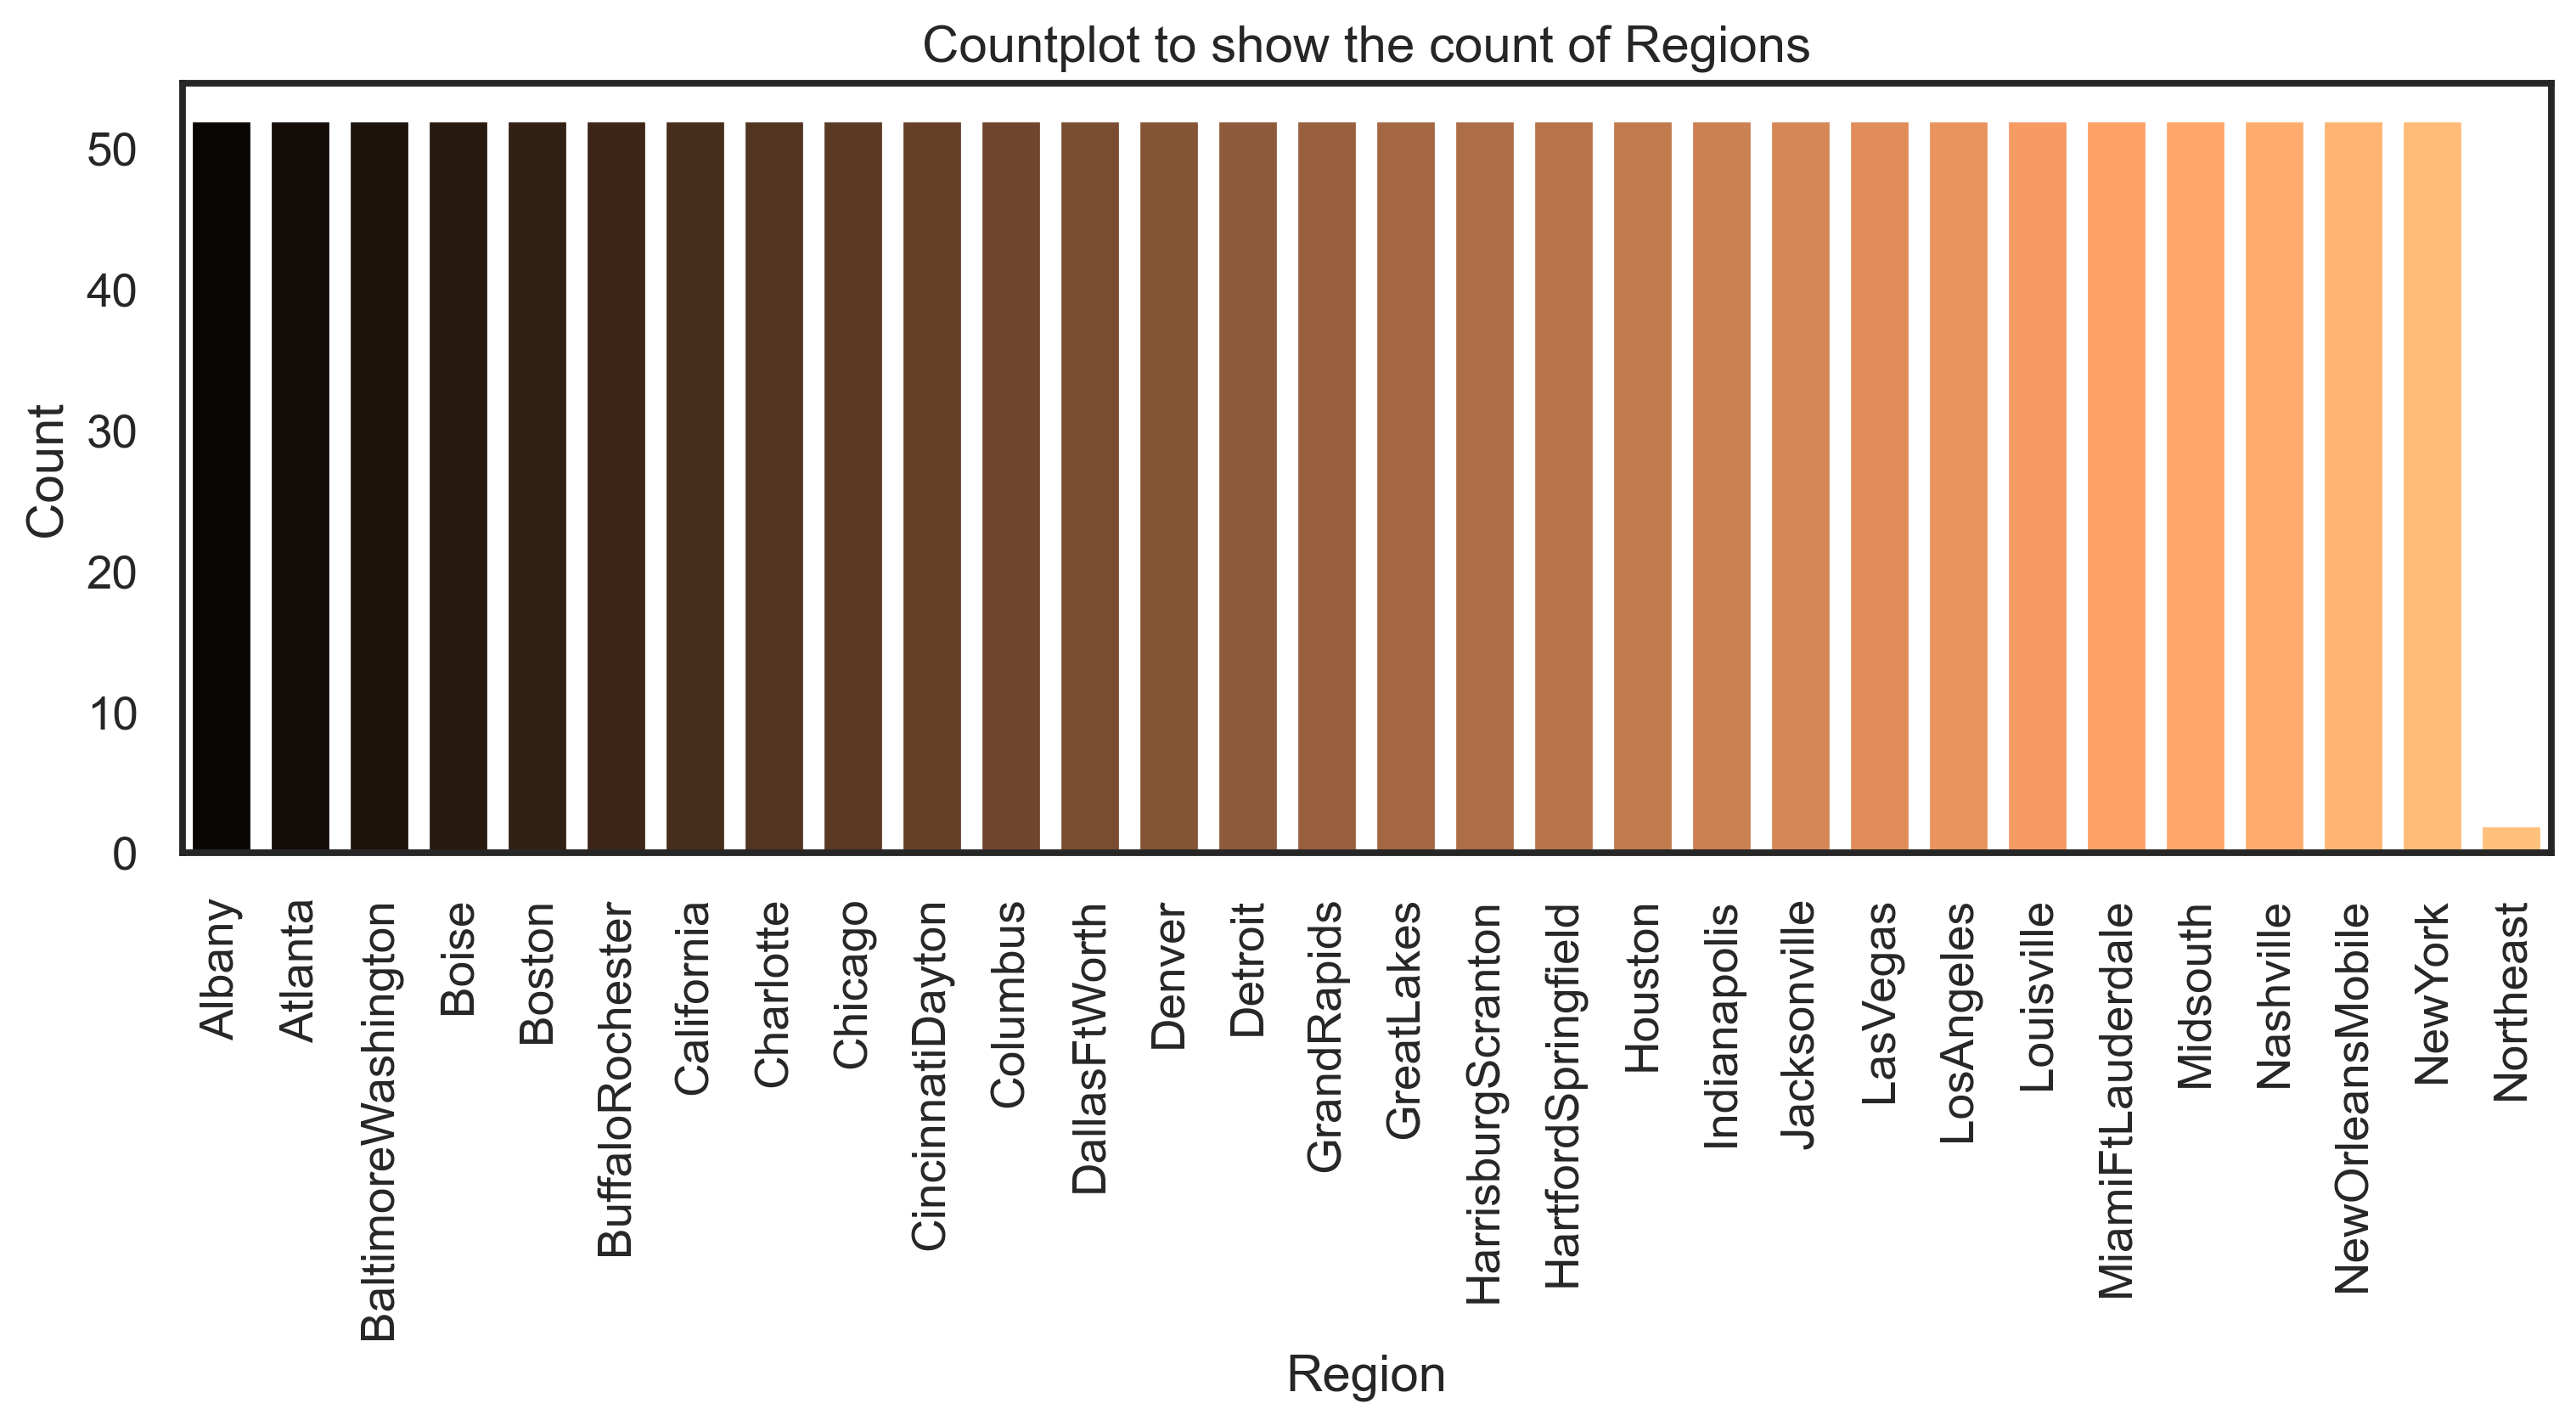

In [22]:
sns.set(style="white")
plt.figure(figsize=(12,4),dpi=300)
sns.set_context("talk",font_scale=0.8)
m1=sns.countplot(x="Region",data=df,orient="v",saturation=18,palette="copper")
m1.set_xticklabels(m1.get_xticklabels(),rotation=90)
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Countplot to show the count of Regions")

##### Above graph is showing all regions, which is present in data

Text(0.5, 1.0, 'Countplot to show types of avocados Available')

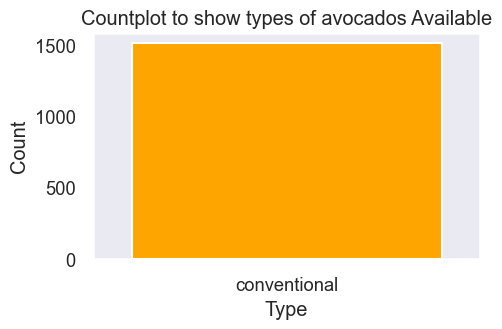

In [23]:
sns.set(style="dark")
plt.figure(figsize=(5,3),dpi=100)
sns.set_context("talk",font_scale=0.8)
sns.countplot(x="Type",data=df,orient="v",saturation=18, color="orange")
plt.xlabel("Type")
plt.ylabel("Count")
plt.title("Countplot to show types of avocados Available")

##### After seeing this graph, we can colclude that we have only one Type of avocado

Text(0.5, 1.0, 'Plot to showing the Bags Sold in diffrent Year')

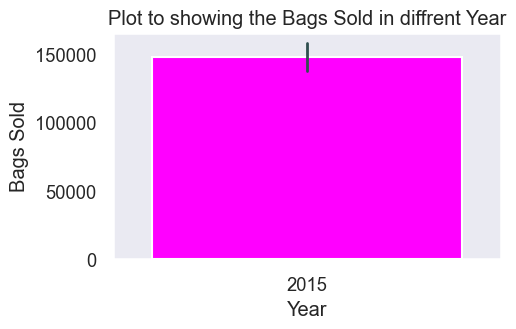

In [24]:
sns.set(style="dark")
plt.figure(figsize=(5,3),dpi=100)
sns.set_context("talk",font_scale=0.8)
sns.barplot(x="Year", y="TotalBags",data=df,ci=95,orient="v",color="magenta",saturation=25,errcolor="darkslategrey",errwidth=2)
plt.xlabel("Year")
plt.ylabel("Bags Sold")
plt.title("Plot to showing the Bags Sold in diffrent Year")

##### Total Volume Sold in diffrent year is also same because we have only one year in dataset

Text(0.5, 1.0, 'Plot to show Volume Sold in different region')

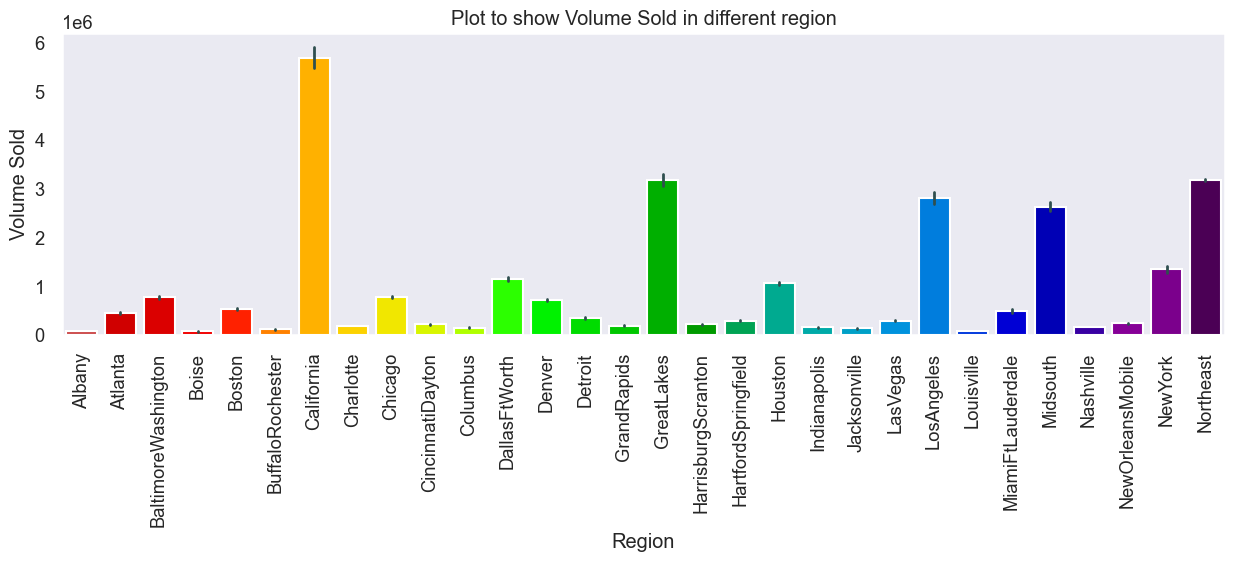

In [25]:
sns.set(style="dark")
plt.figure(figsize=(15,4),dpi=100)

sns.set_context("talk",font_scale=0.8)
m1=sns.barplot(x="Region", y="TotalVolume",data=df,ci=95,orient="v",palette="nipy_spectral_r", saturation=25,errcolor="darkslategrey",errwidth=2)
m1.set_xticklabels(m1.get_xticklabels(),rotation=90)
plt.xlabel("Region")
plt.ylabel("Volume Sold")
plt.title("Plot to show Volume Sold in different region")

##### From graph we can say that, California sold maximum volume of avocados  & (Albany, Louisville) have sold minimum volume of avocados  in a year

Text(0.5, 1.0, 'Plot to show Bags sold in different region')

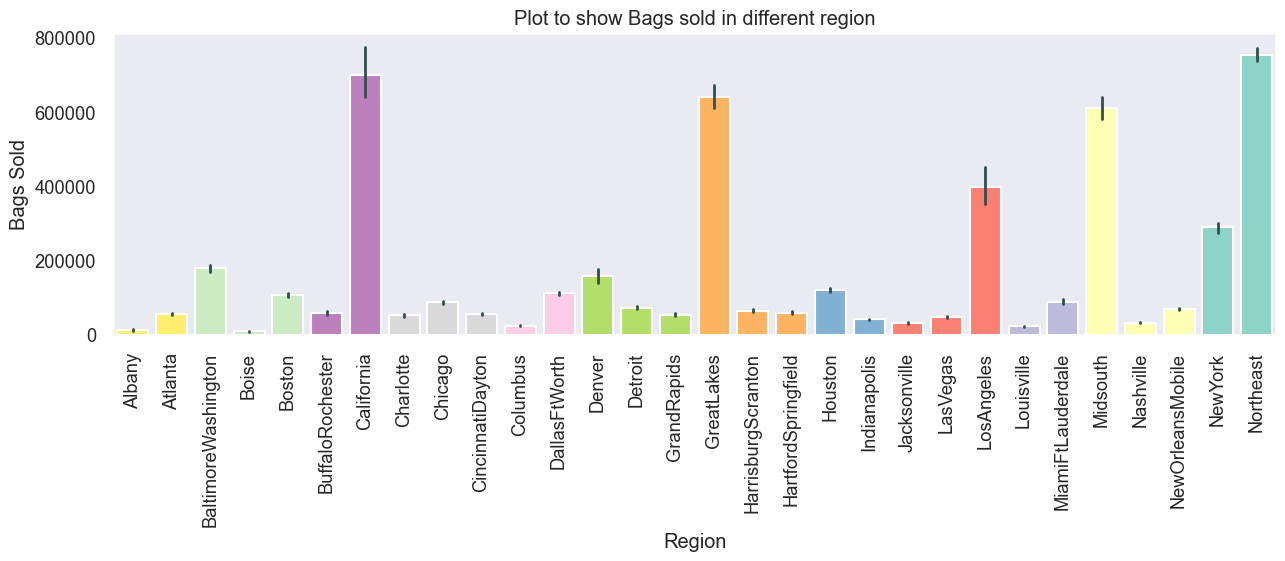

In [26]:
sns.set(style="dark")
plt.figure(figsize=(15,4),dpi=100)
sns.set_context("talk", font_scale=0.8)
m1=sns.barplot(x="Region", y="TotalBags",data=df,ci=95,orient="v",palette="Set3_r", saturation=25,errcolor="darkslategrey",errwidth=2)
m1.set_xticklabels(m1.get_xticklabels(),rotation=90)
plt.xlabel("Region")
plt.ylabel("Bags Sold")
plt.title("Plot to show Bags sold in different region")

##### After see above graph, we can suprise because the Northeast region has sold the maximum bags of avocados but when we talk about the total volume of avocados sold than northeast doing average only.
##### California sold maximum bags after northeast region & Louisville region sold minimum bags

Text(0.5, 1.0, 'Plot to show Price in Different regions')

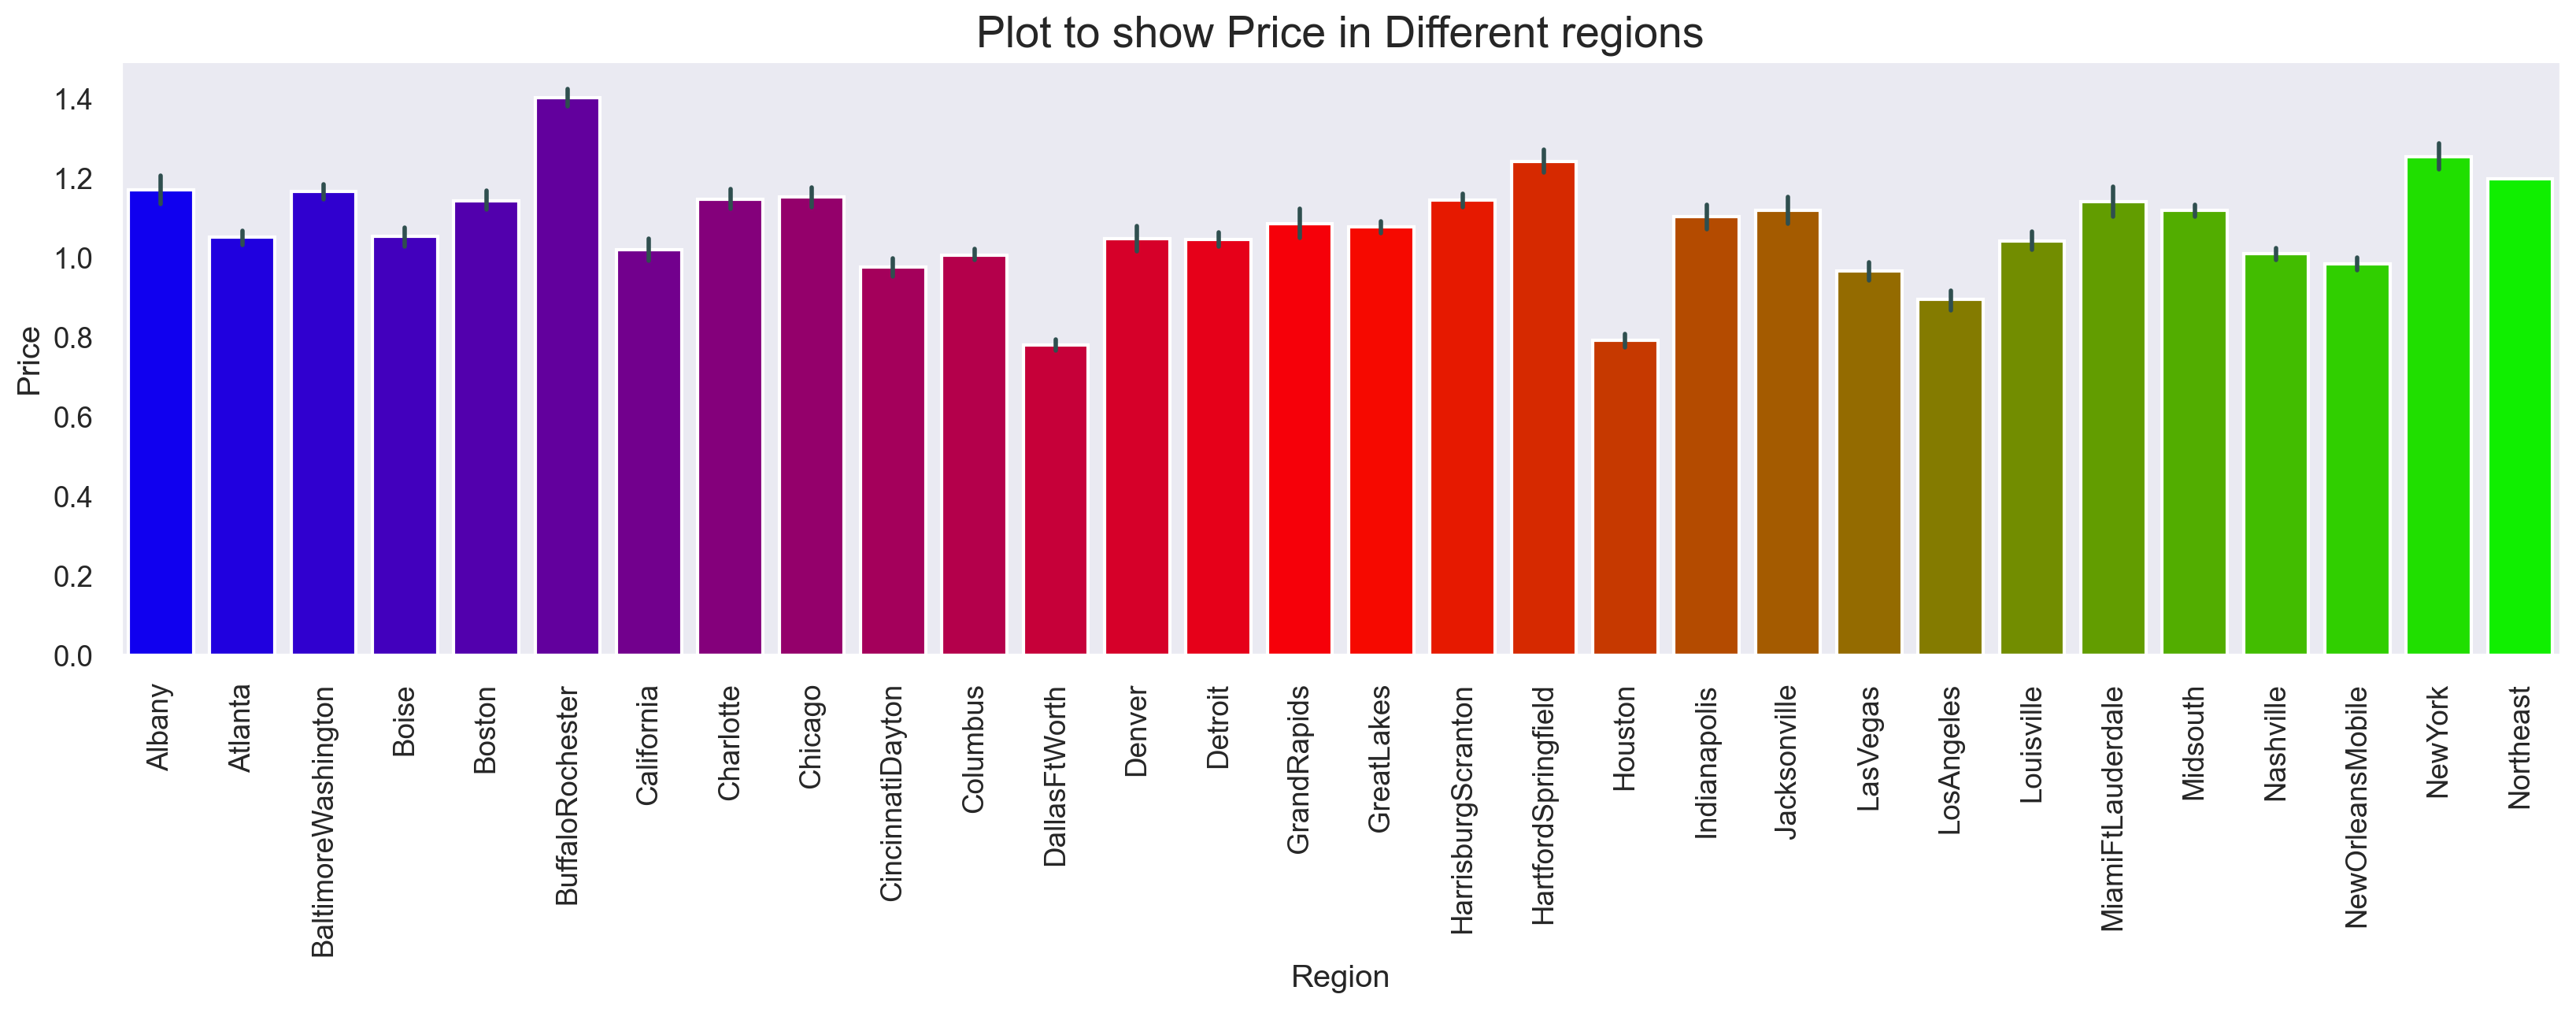

In [27]:
sns.set(style="dark")
plt.figure(figsize=(20,5),dpi=200)
sns.set_context("talk", font_scale=0.8)
m1=sns.barplot(x="Region", y="AveragePrice",data=df,ci=95,orient="v",palette="brg",saturation=25,errcolor="darkslategrey",errwidth=2)
m1.set_xticklabels(m1.get_xticklabels(),rotation=90)
plt.xlabel("Region")
plt.ylabel("Price")
plt.title("Plot to show Price in Different regions",fontsize=20)


##### The average price of avocado is low in "Houston" while it is high in "Buffalo Rochester"

Text(0.5, 1.0, 'plot to see the change in Price of Avocados in Month')

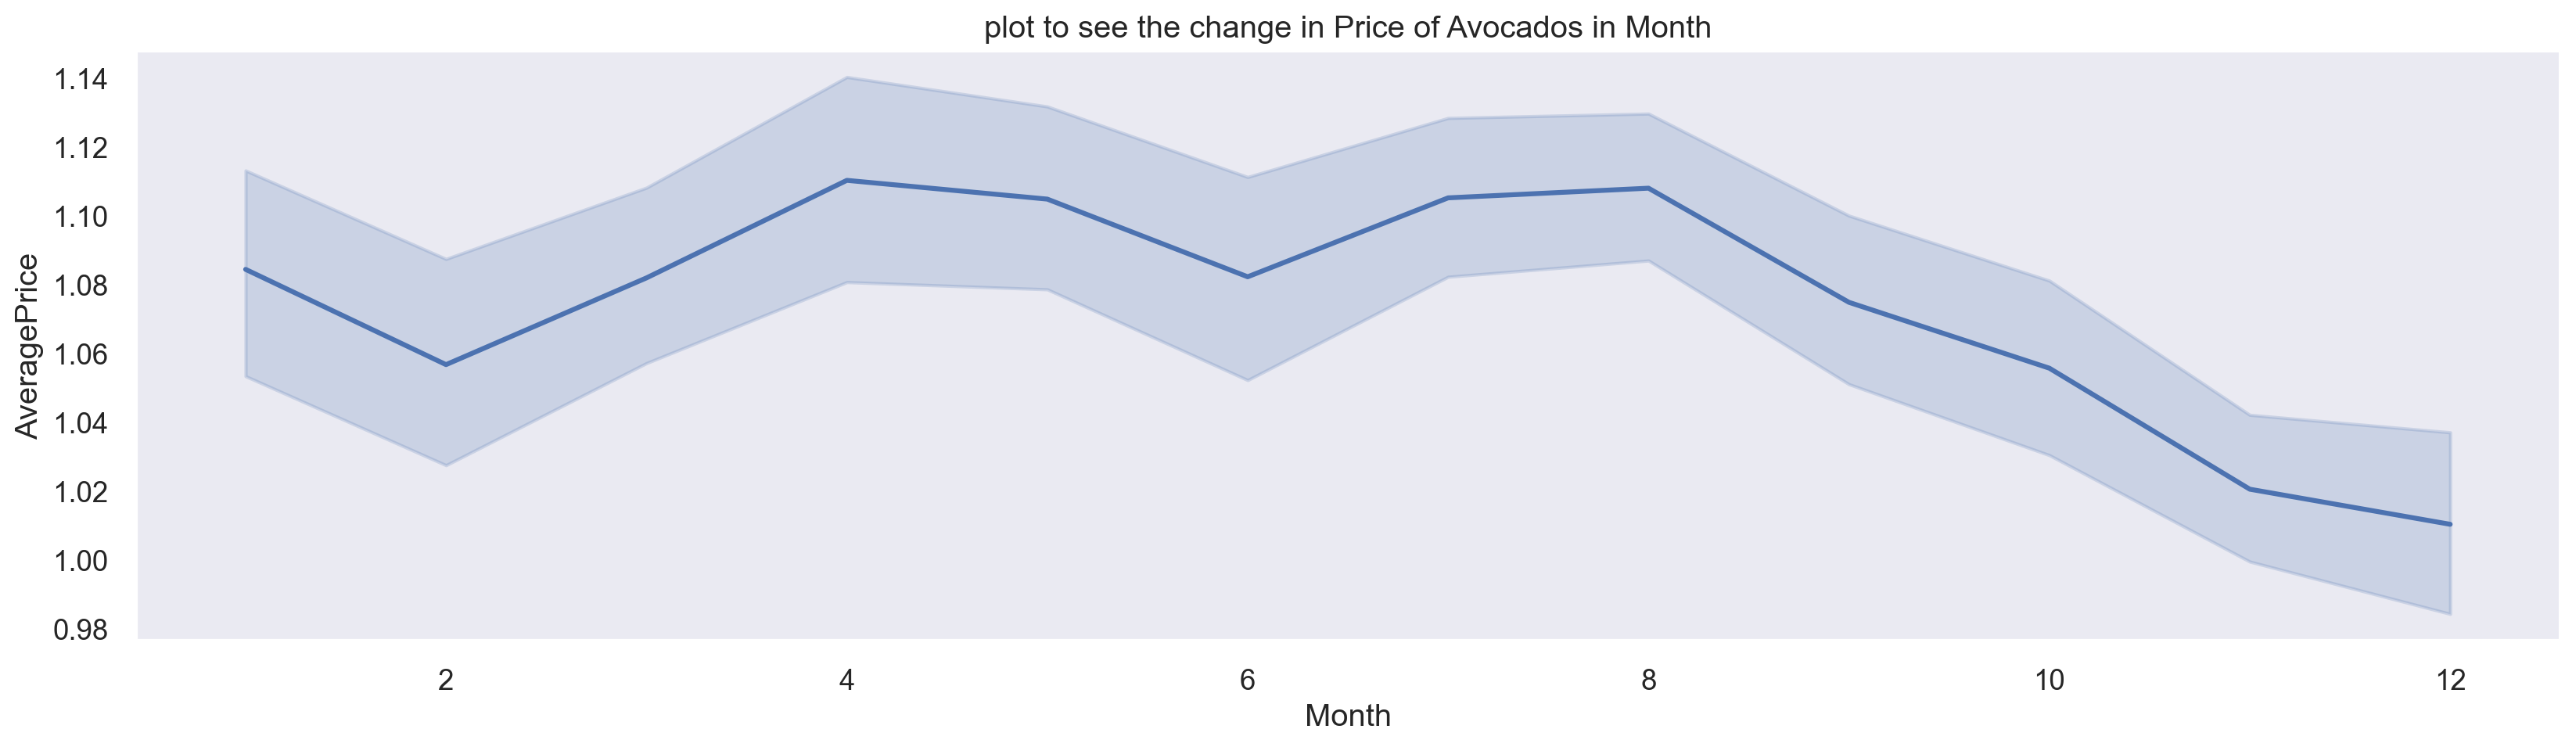

In [28]:
sns.set(style="dark")
plt.figure(figsize=(20,5),dpi=200)
sns.set_context("talk",font_scale=0.8)
sns.lineplot(x="Month",y="AveragePrice",data=df,estimator="mean",ci=95)
plt.title("plot to see the change in Price of Avocados in Month")

##### We can't plot yearwise because we have only one year. There is an decrese in average price of avocados in the end of the year or in the last quater of the year.

Text(0.5, 1.0, 'Plot to see the Sales of Small Avocados')

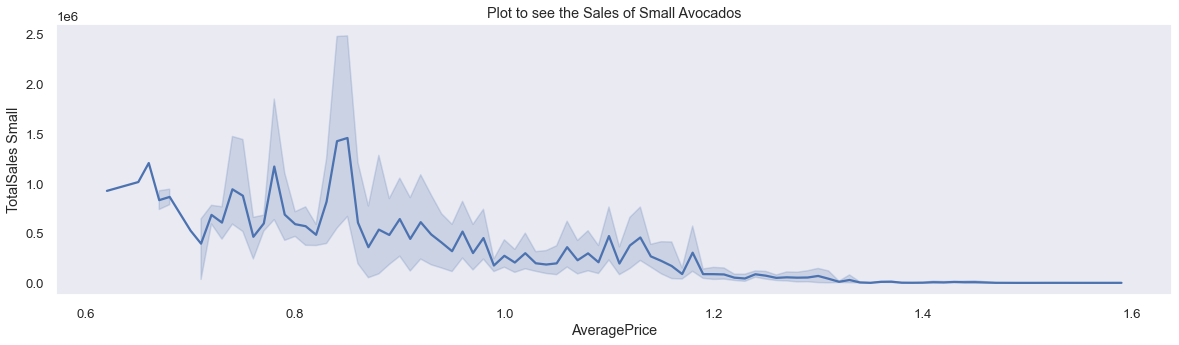

In [29]:
sns.set(style="dark")
plt.figure(figsize=(20,5))
sns.set_context("talk",font_scale=0.8)
sns.lineplot(x="AveragePrice",y="TotalSales Small",data=df,estimator="mean",ci=95)
plt.title("Plot to see the Sales of Small Avocados")

##### From above graph we can say that there is an decrese in sales of small avocados at high price around 1.6

Text(0.5, 1.0, 'Plot to see the sales of Large Avocados')

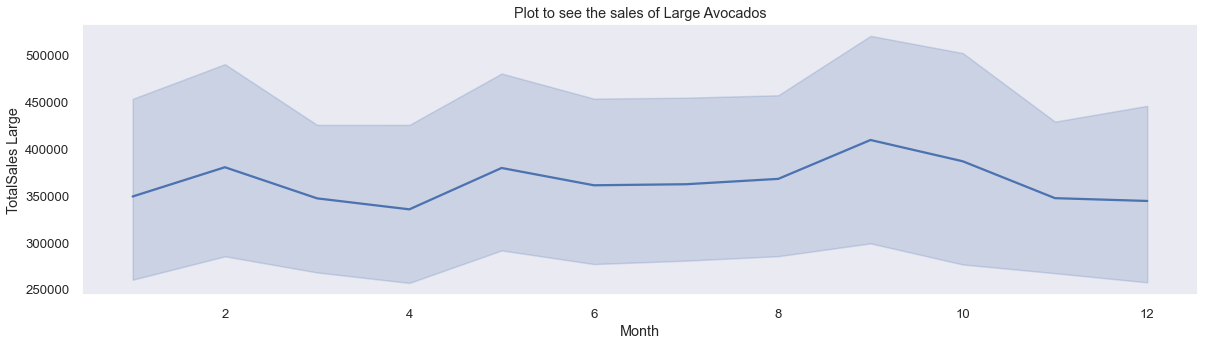

In [30]:
sns.set(style="dark")
plt.figure(figsize=(20,5))
sns.set_context("talk",font_scale=0.8)
sns.lineplot(x="Month",y="TotalSales Large",data=df,estimator="mean",ci=95)
plt.title("Plot to see the sales of Large Avocados")

##### There is not a big change in Large Avocados sales Month wise

Text(0.5, 1.0, 'Plot to see the sales of Small Avocados in different regions')

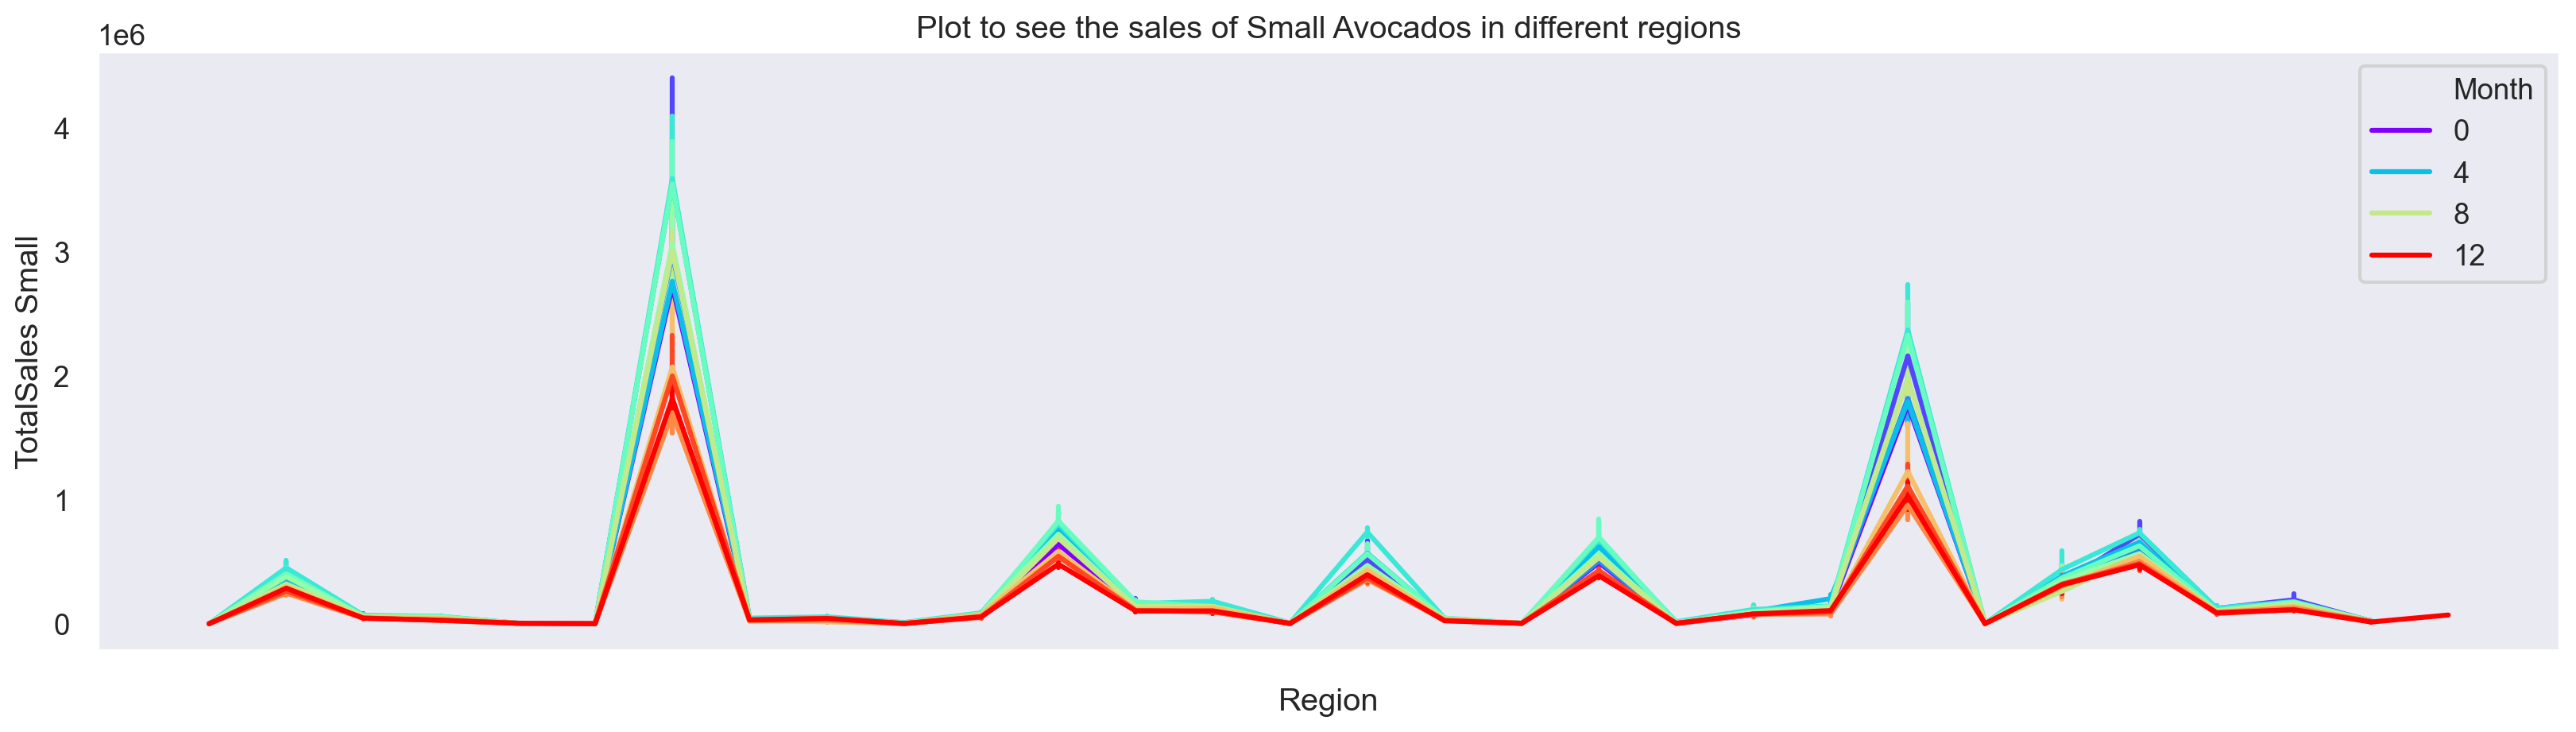

In [31]:
sns.set(style="dark")
plt.figure(figsize=(20,5),dpi=200)
sns.set_context("talk",font_scale=0.8)
m1=sns.lineplot(x="Region",y="TotalSales Small",hue="Month",palette="rainbow",data=df,ci=95,err_style="bars")
m1.set_xticklabels(m1.get_xticklabels(),rotation=75)
plt.title("Plot to see the sales of Small Avocados in different regions")

##### We can see the decrease in monthwise sales of avocados in regions, going end of the year, sales also decrease with months.

Text(0.5, 1.0, 'Plot to see the sales Small bags in different regions')

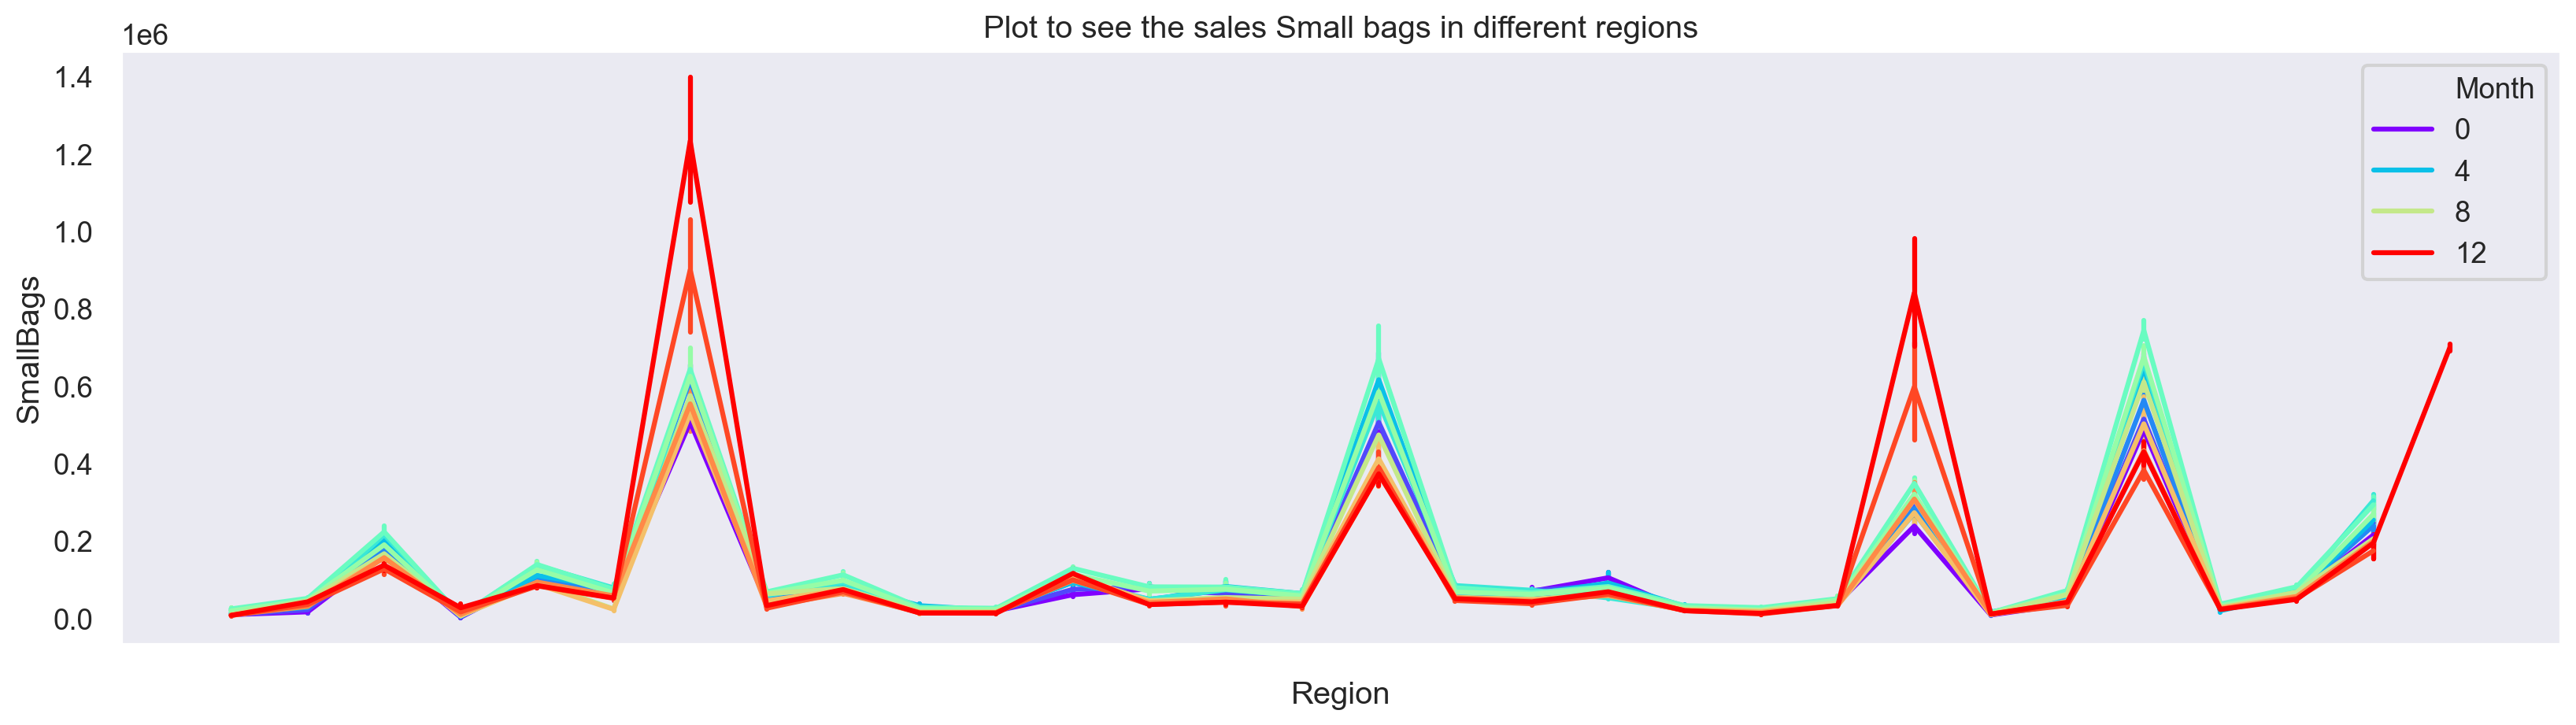

In [32]:
sns.set(style="dark")
plt.figure(figsize=(20,5),dpi=200)
sns.set_context("talk",font_scale=0.8)
M=sns.lineplot(x="Region",y="SmallBags",hue="Month",palette="rainbow",data=df,ci=95,err_style="bars")
M.set_xticklabels(M.get_xticklabels(),rotation=70)
plt.title("Plot to see the sales Small bags in different regions")

##### Suprisingly different,what  we are thinking, but here in the quater of the year sales of Small bags of Avocados is increase.

Text(0.5, 1.0, 'Plot to see the sales of Large Bags of Avocados in different regions')

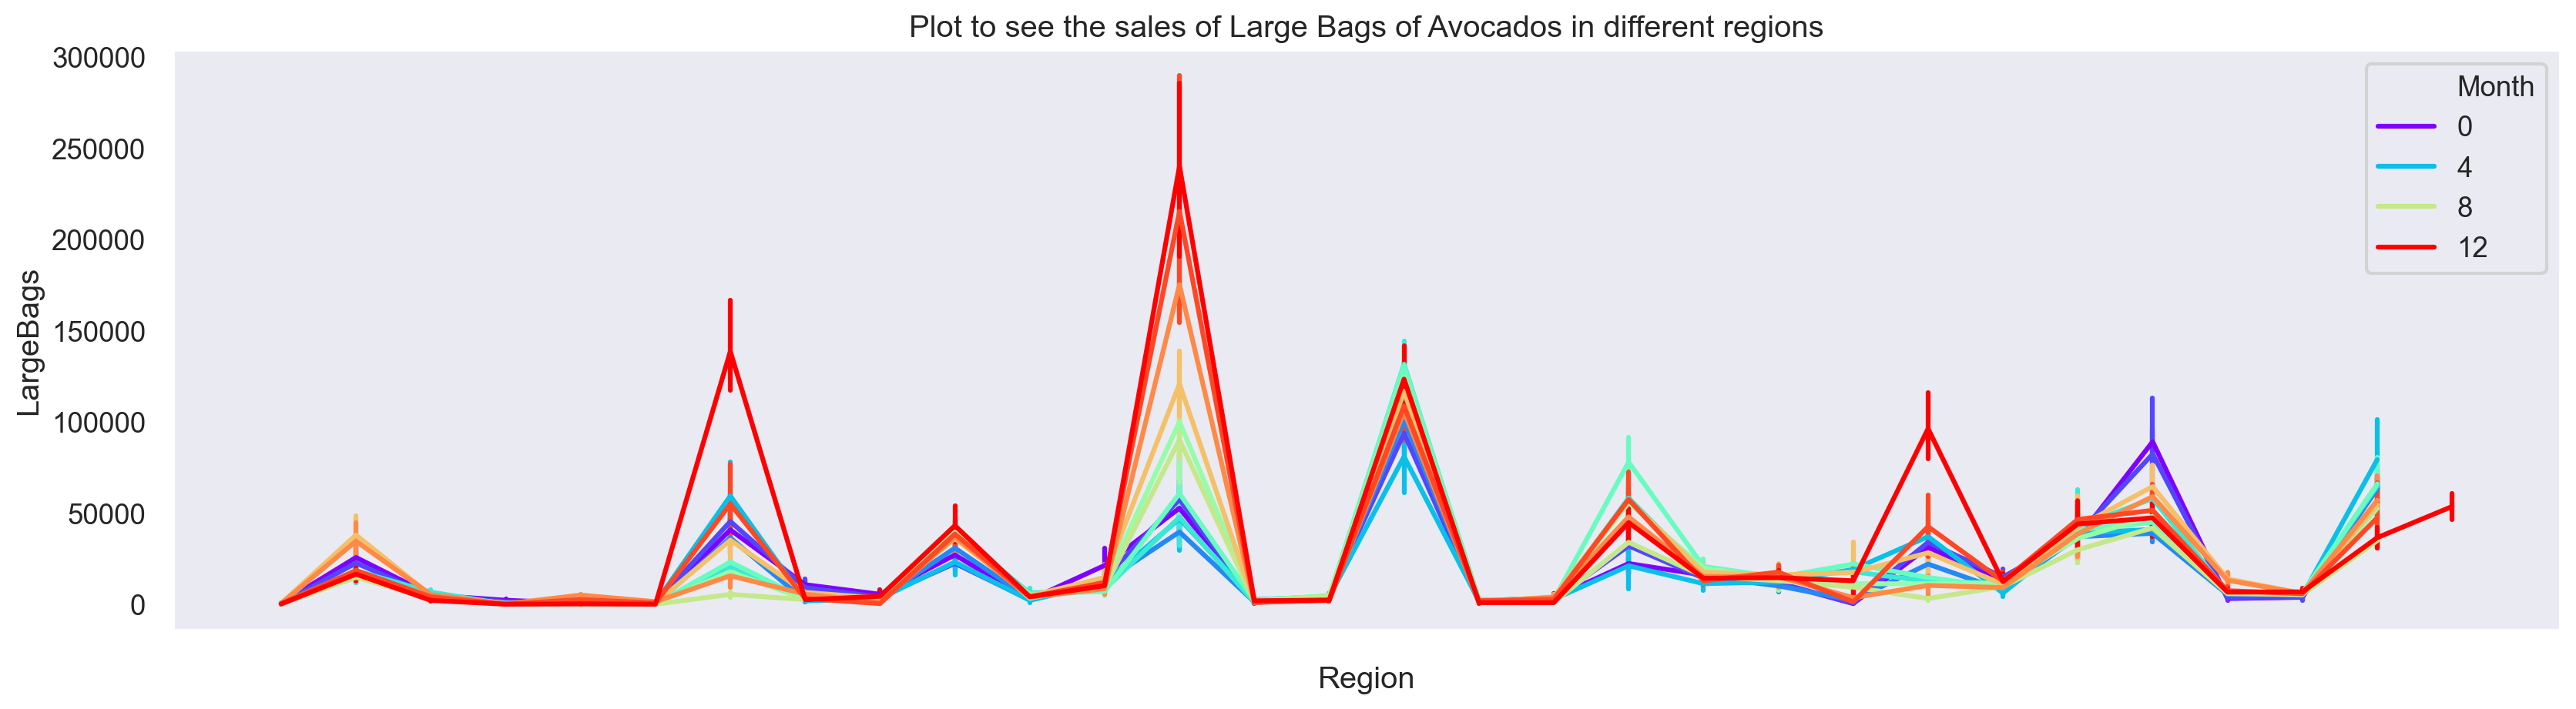

In [33]:
sns.set(style="dark")
plt.figure(figsize=(20,5),dpi=200)
sns.set_context("talk",font_scale=0.8)
M=sns.lineplot(x="Region",y="LargeBags",hue="Month",palette="rainbow",data=df,ci=95,err_style="bars")
M.set_xticklabels(M.get_xticklabels(),rotation=70)
plt.title("Plot to see the sales of Large Bags of Avocados in different regions")

##### Same as above, in last quater sales of Large bags of avocados is increases.

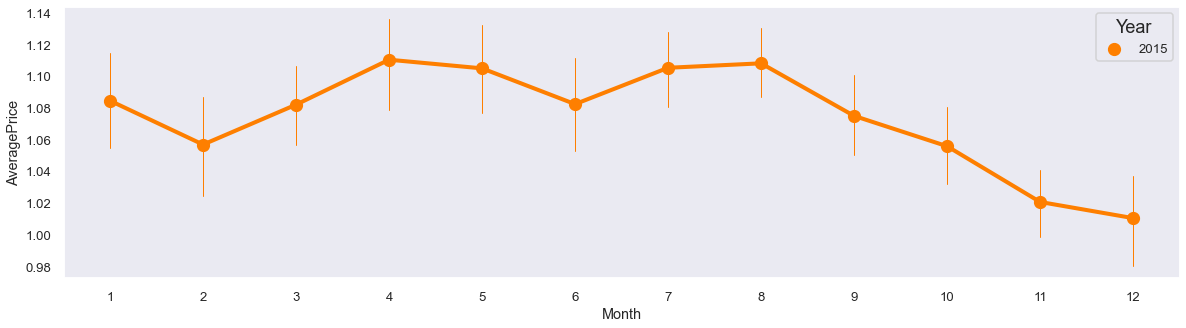

In [34]:
sns.set(style="dark")
plt.figure(figsize=(20,5))
sns.set_context("talk",font_scale=0.8)
sns.pointplot(x="Month",y="AveragePrice",hue="Year",data=df,ci=95,markers="o", linestyle=".",orient="v",palette="afmhot_r",errwidth="1")

##### Ok now we can relate all the other things. After seeing above graph, the average price of avocados in last quater is ver y low as compared to first 3 quaters.

### Now we will convert object datatype to numeric.

In [35]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
df["Region"]=lbl.fit_transform(df["Region"])
df["Type"]=lbl.fit_transform(df["Type"])

##### Searching for outliers by using boxplot, further will remove the outliers by using zscore

##### but before that we will drop some unwanted columns
##### we have only One year which 2015 only
##### we have only one Type which is Conventional only, so we are going drop these columns

In [36]:
df.drop(["Type","Year"],axis=1, inplace=True)
df.head()

Date  AveragePrice  TotalVolume  TotalSales Small  TotalSales Large  \
0 2015-12-27          1.33     64236.62           1036.74          54454.85   
1 2015-12-20          1.35     54876.98            674.28          44638.81   
2 2015-12-13          0.93    118220.22            794.70         109149.67   
3 2015-12-06          1.08     78992.15           1132.00          71976.41   
4 2015-11-29          1.28     51039.60            941.48          43838.39   

   TotalSales XLarge  TotalBags  SmallBags  LargeBags  XLargeBags  Region  \
0              48.16    8696.87    8603.62      93.25         0.0       0   
1              58.33    9505.56    9408.07      97.49         0.0       0   
2             130.50    8145.35    8042.21     103.14         0.0       0   
3              72.58    5811.16    5677.40     133.76         0.0       0   
4              75.78    6183.95    5986.26     197.69         0.0       0   

   Month  Day  
0     12   27  
1     12   20  
2     12   13  
3     12    6  
4     11   29

In [37]:
df.drop(["Date"],axis=1,inplace=True)

In [38]:
cl=df.columns.values
cl

array(['AveragePrice', 'TotalVolume', 'TotalSales Small',
       'TotalSales Large', 'TotalSales XLarge', 'TotalBags', 'SmallBags',
       'LargeBags', 'XLargeBags', 'Region', 'Month', 'Day'], dtype=object)

In [39]:
df.dtypes

AveragePrice         float64
TotalVolume          float64
TotalSales Small     float64
TotalSales Large     float64
TotalSales XLarge    float64
TotalBags            float64
SmallBags            float64
LargeBags            float64
XLargeBags           float64
Region                 int32
Month                  int64
Day                    int64
dtype: object

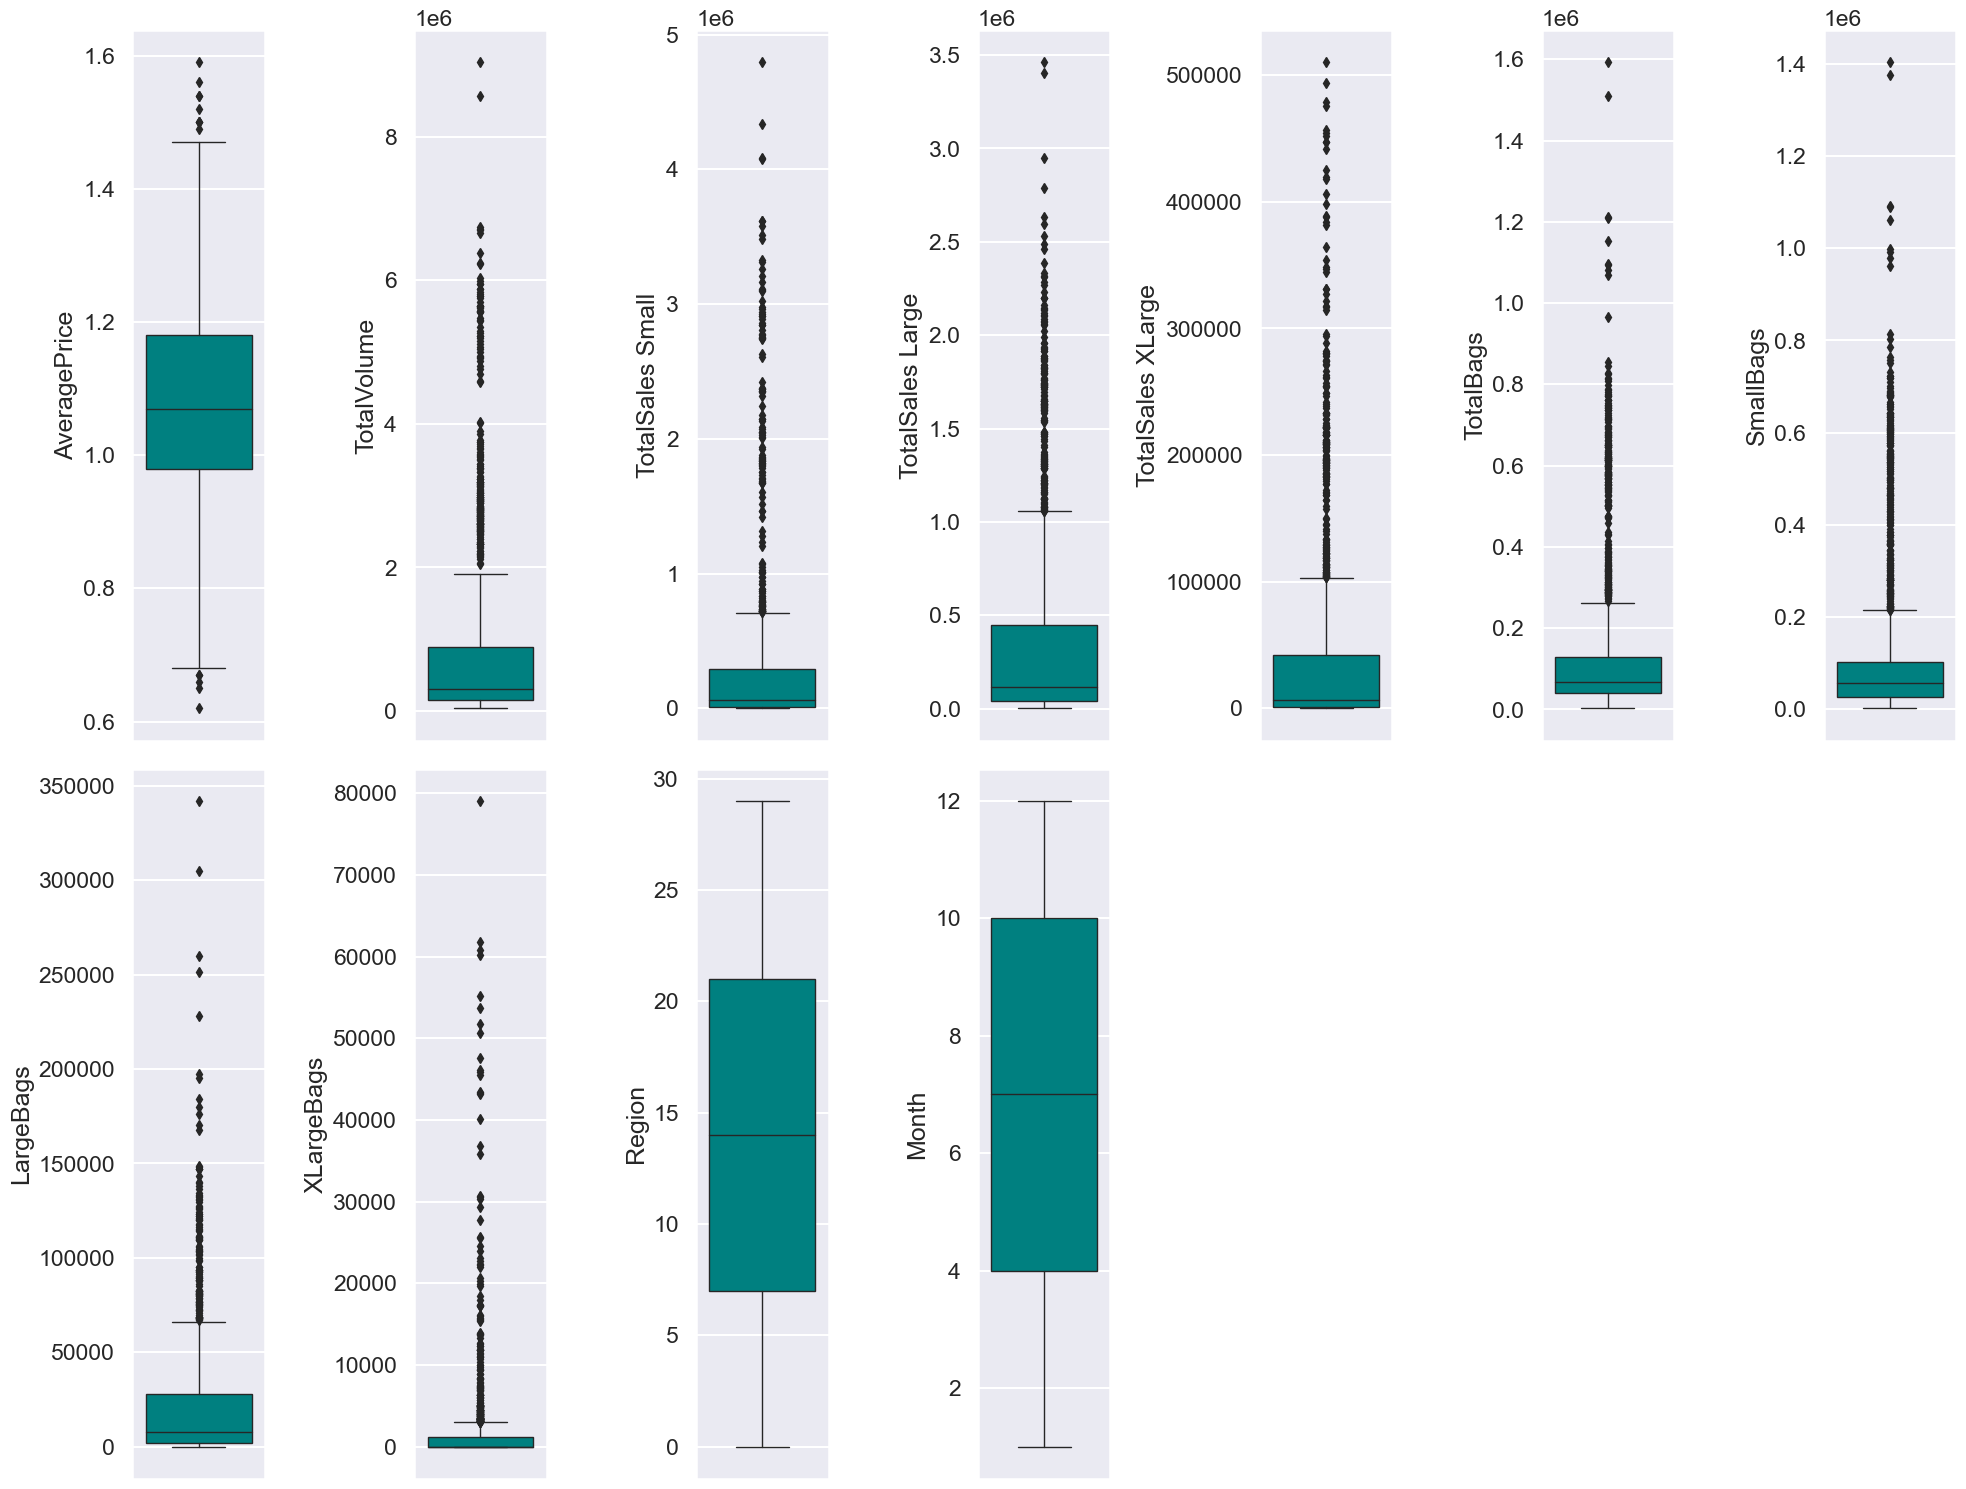

In [40]:
sns.set(style="darkgrid")
plt.figure(dpi=100,figsize=(20,30))
sns.set_context("talk",font_scale=1)
for i in range (0,11):
    plt.subplot(4,7,i+1)
    sns.boxplot(df[cl[i]],color="teal",linewidth=1,saturation=14,orient="v")
plt.tight_layout()  

##### there are many outliers, which have to treated by using z score

In [41]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.64530824, 0.62497206, 0.48088362, ..., 1.67324751, 1.59778054,
        1.31152353],
       [1.77430178, 0.63245657, 0.48148272, ..., 1.67324751, 1.59778054,
        0.51645564],
       [0.93456242, 0.58180369, 0.48128368, ..., 1.67324751, 1.59778054,
        0.27861225],
       ...,
       [0.09738585, 0.44549183, 0.44352176, ..., 1.6685052 , 1.61324606,
        1.3008424 ],
       [0.80685028, 1.84766664, 0.36702779, ..., 1.78785351, 1.59778054,
        1.31152353],
       [0.80685028, 1.87466294, 0.3626378 , ..., 1.78785351, 1.59778054,
        0.51645564]])

In [42]:
print(np.where(z>3))

(array([ 275,  276,  312,  312,  312,  313,  313,  313,  313,  314,  314,
        314,  314,  315,  315,  315,  315,  315,  316,  316,  317,  317,
        317,  318,  318,  318,  318,  318,  319,  319,  319,  319,  320,
        320,  320,  321,  322,  322,  323,  323,  324,  324,  325,  325,
        326,  326,  327,  327,  328,  328,  328,  329,  329,  330,  330,
        331,  331,  332,  332,  332,  333,  333,  334,  334,  335,  335,
        336,  336,  337,  337,  337,  337,  337,  338,  338,  339,  339,
        340,  340,  341,  341,  342,  342,  343,  343,  344,  344,  345,
        345,  346,  346,  346,  347,  347,  348,  348,  348,  349,  349,
        349,  350,  350,  351,  351,  352,  352,  352,  352,  353,  353,
        354,  354,  355,  355,  355,  356,  356,  357,  357,  358,  358,
        358,  359,  359,  359,  360,  360,  361,  361,  361,  362,  362,
        362,  363,  363,  363,  573,  624,  625,  626,  627,  629,  630,
        631,  632,  633,  634,  635,  636,  637,  

##### Checking few values

In [43]:
print(z[398],"\n",z[1203][7],"\n",z[1182][2])

[0.48308505 0.46723523 0.39961777 0.55537081 0.44285917 0.41314413
 0.35920643 0.48054259 0.30147767 0.83780934 0.44560002 1.41442352] 
 0.2640347708060832 
 2.4156285636280916


In [44]:
df1 = df[(z<3).all(axis=1)]

print("The Shape before removing outliers:\t",df.shape,"\nThe shape after removal outlier:\t",df1.shape,
     "\nSoa toatl of", len(df)-len(df1),"Rows has been removed")

The Shape before removing outliers:	 (1510, 12) 
The shape after removal outlier:	 (1362, 12) 
Soa toatl of 148 Rows has been removed


In [45]:
df1.head()

AveragePrice  TotalVolume  TotalSales Small  TotalSales Large  \
0          1.33     64236.62           1036.74          54454.85   
1          1.35     54876.98            674.28          44638.81   
2          0.93    118220.22            794.70         109149.67   
3          1.08     78992.15           1132.00          71976.41   
4          1.28     51039.60            941.48          43838.39   

   TotalSales XLarge  TotalBags  SmallBags  LargeBags  XLargeBags  Region  \
0              48.16    8696.87    8603.62      93.25         0.0       0   
1              58.33    9505.56    9408.07      97.49         0.0       0   
2             130.50    8145.35    8042.21     103.14         0.0       0   
3              72.58    5811.16    5677.40     133.76         0.0       0   
4              75.78    6183.95    5986.26     197.69         0.0       0   

   Month  Day  
0     12   27  
1     12   20  
2     12   13  
3     12    6  
4     11   29

In [46]:
df.shape

(1510, 12)

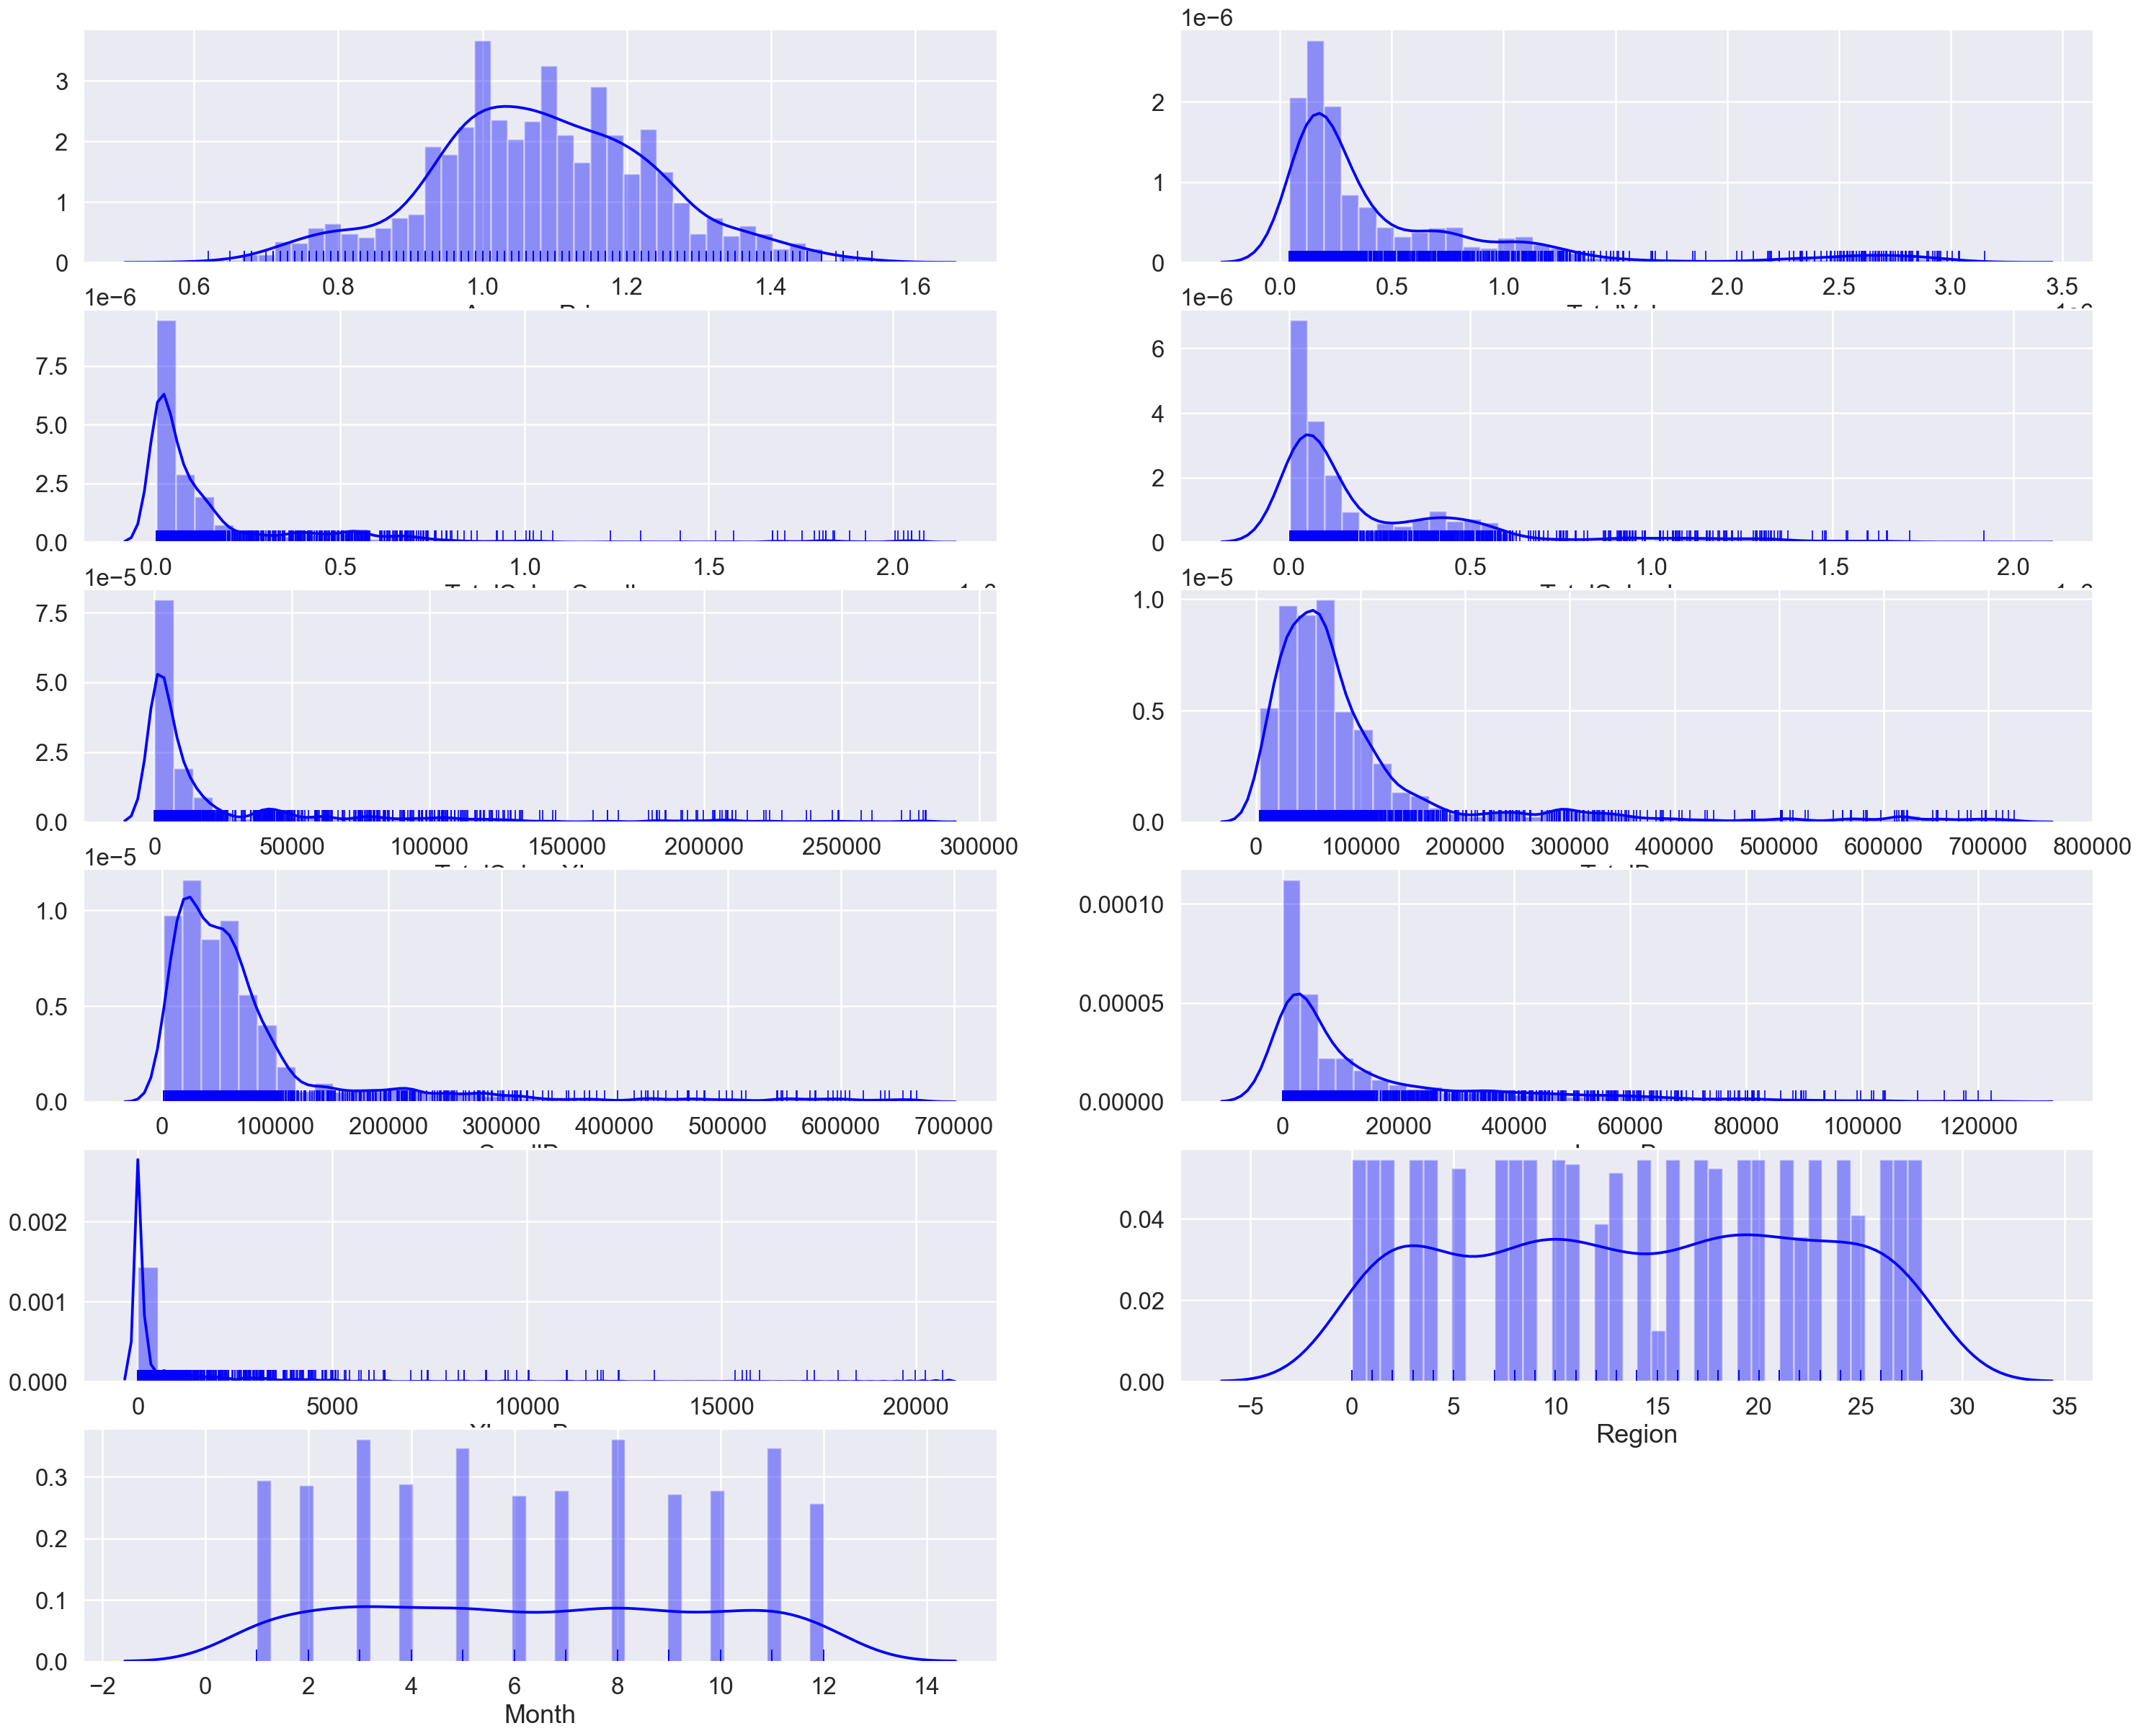

In [47]:
sns.set(style="darkgrid")
plt.figure(dpi=120,figsize=(30,25))
sns.set_context("talk",font_scale=1.2)
for i in range (0,11):
    plt.subplot(6,2,i+1)
    sns.distplot(df1[cl[i]],bins=40,hist=True,kde=True,rug=True,color="Blue")

##### From above graph we can understand the distribution of all attributes

### Checking for skewness

In [48]:
df1.skew()

AveragePrice         0.019314
TotalVolume          2.220084
TotalSales Small     3.515605
TotalSales Large     2.088033
TotalSales XLarge    2.956117
TotalBags            2.975046
SmallBags            3.023169
LargeBags            1.996978
XLargeBags           4.738044
Region              -0.033057
Month                0.026610
Day                  0.007623
dtype: float64

##### Skewness above 0.5 is not acceptable, so we are going to treat  our skewed data and must be removed

In [49]:
for i in df1.columns:
    if df1.skew().loc[i]>0.55:
        df1[i]=np.log(df1)
df1.skew()

AveragePrice         0.019314
TotalVolume         -0.440934
TotalSales Small    -0.440934
TotalSales Large    -0.440934
TotalSales XLarge   -0.440934
TotalBags           -0.440934
SmallBags           -0.440934
LargeBags           -0.440934
XLargeBags          -0.440934
Region              -0.033057
Month                0.026610
Day                  0.007623
dtype: float64

##### We can see the skewed data is removed

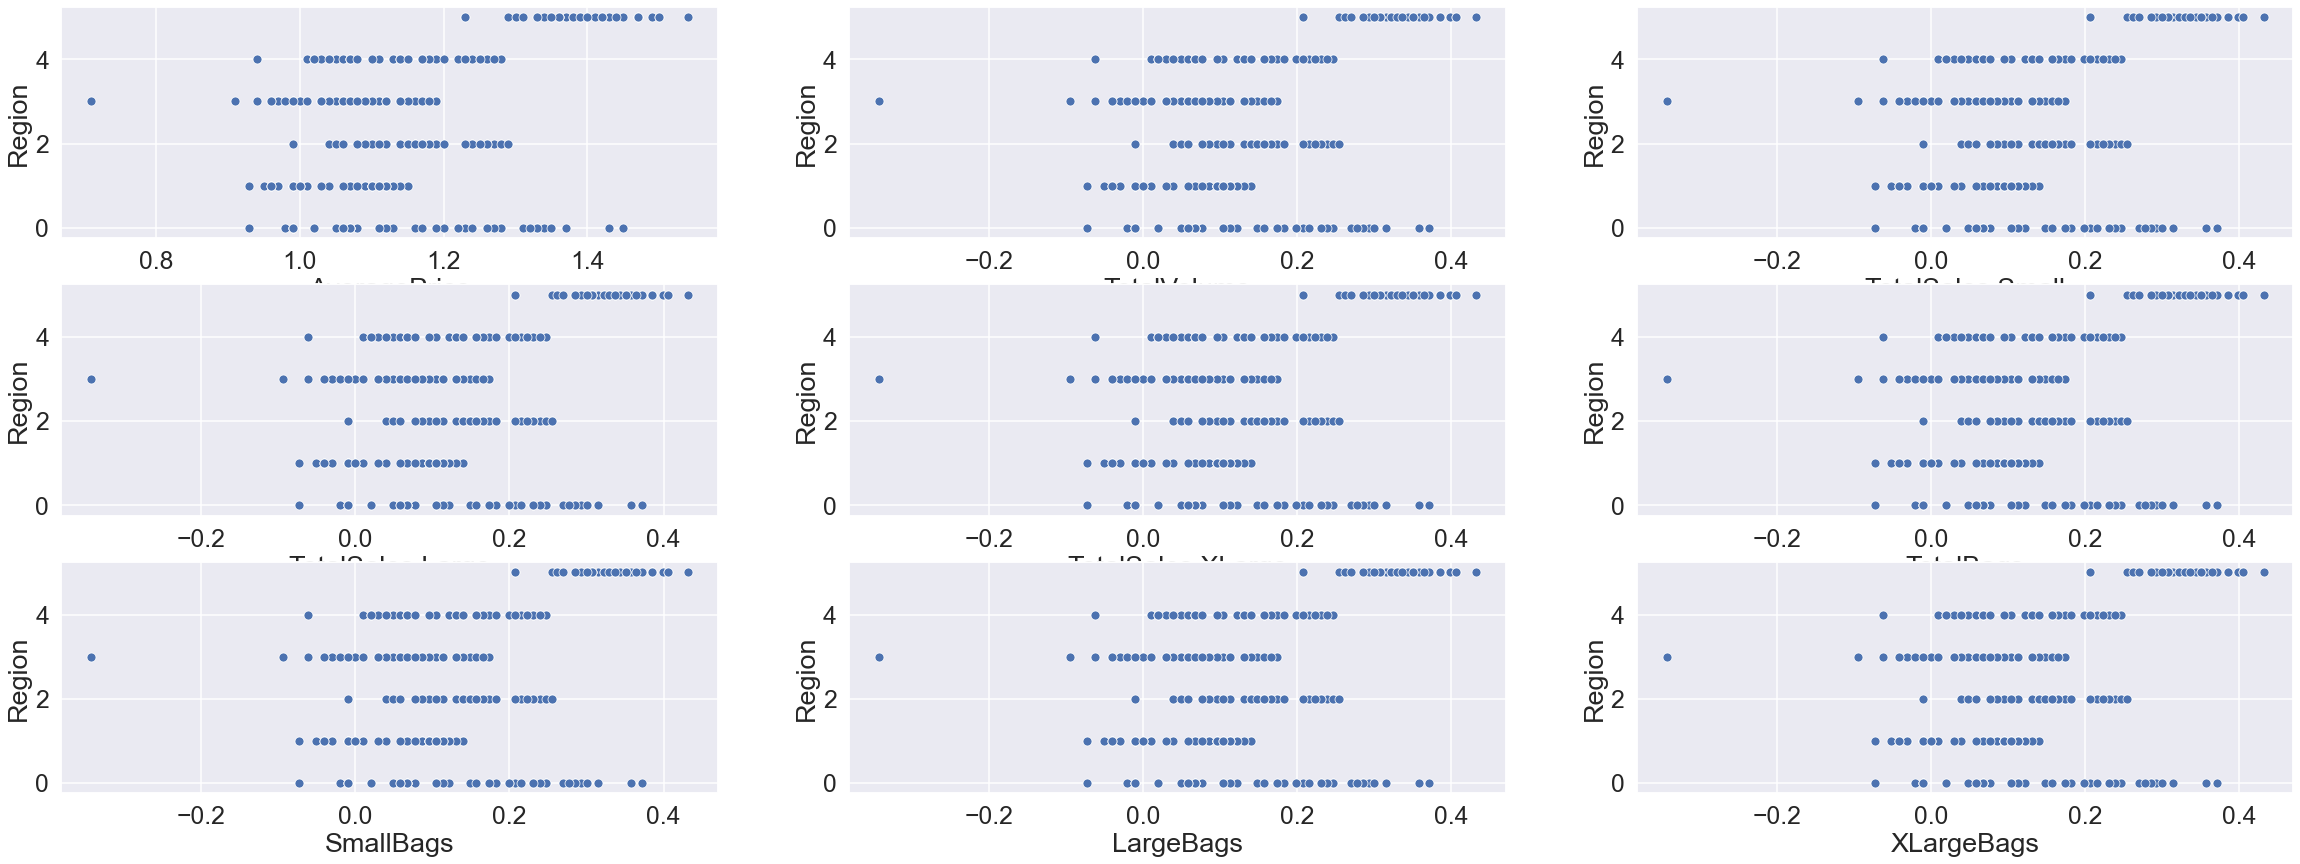

In [50]:
sns.set(style="darkgrid")
plt.figure(figsize=(40,40))
sns.set_context("talk",font_scale=1.5)
for i in range (0,9):
    plt.subplot(8,3,i+1)
    sns.scatterplot(x=(df1[cl[i]]).head(500),y=(df1["Region"]).head(300),ci=95,palette="gnuplot")
    

##### Plotting the scatter plot for the first 500 rows of all attributes vs Region

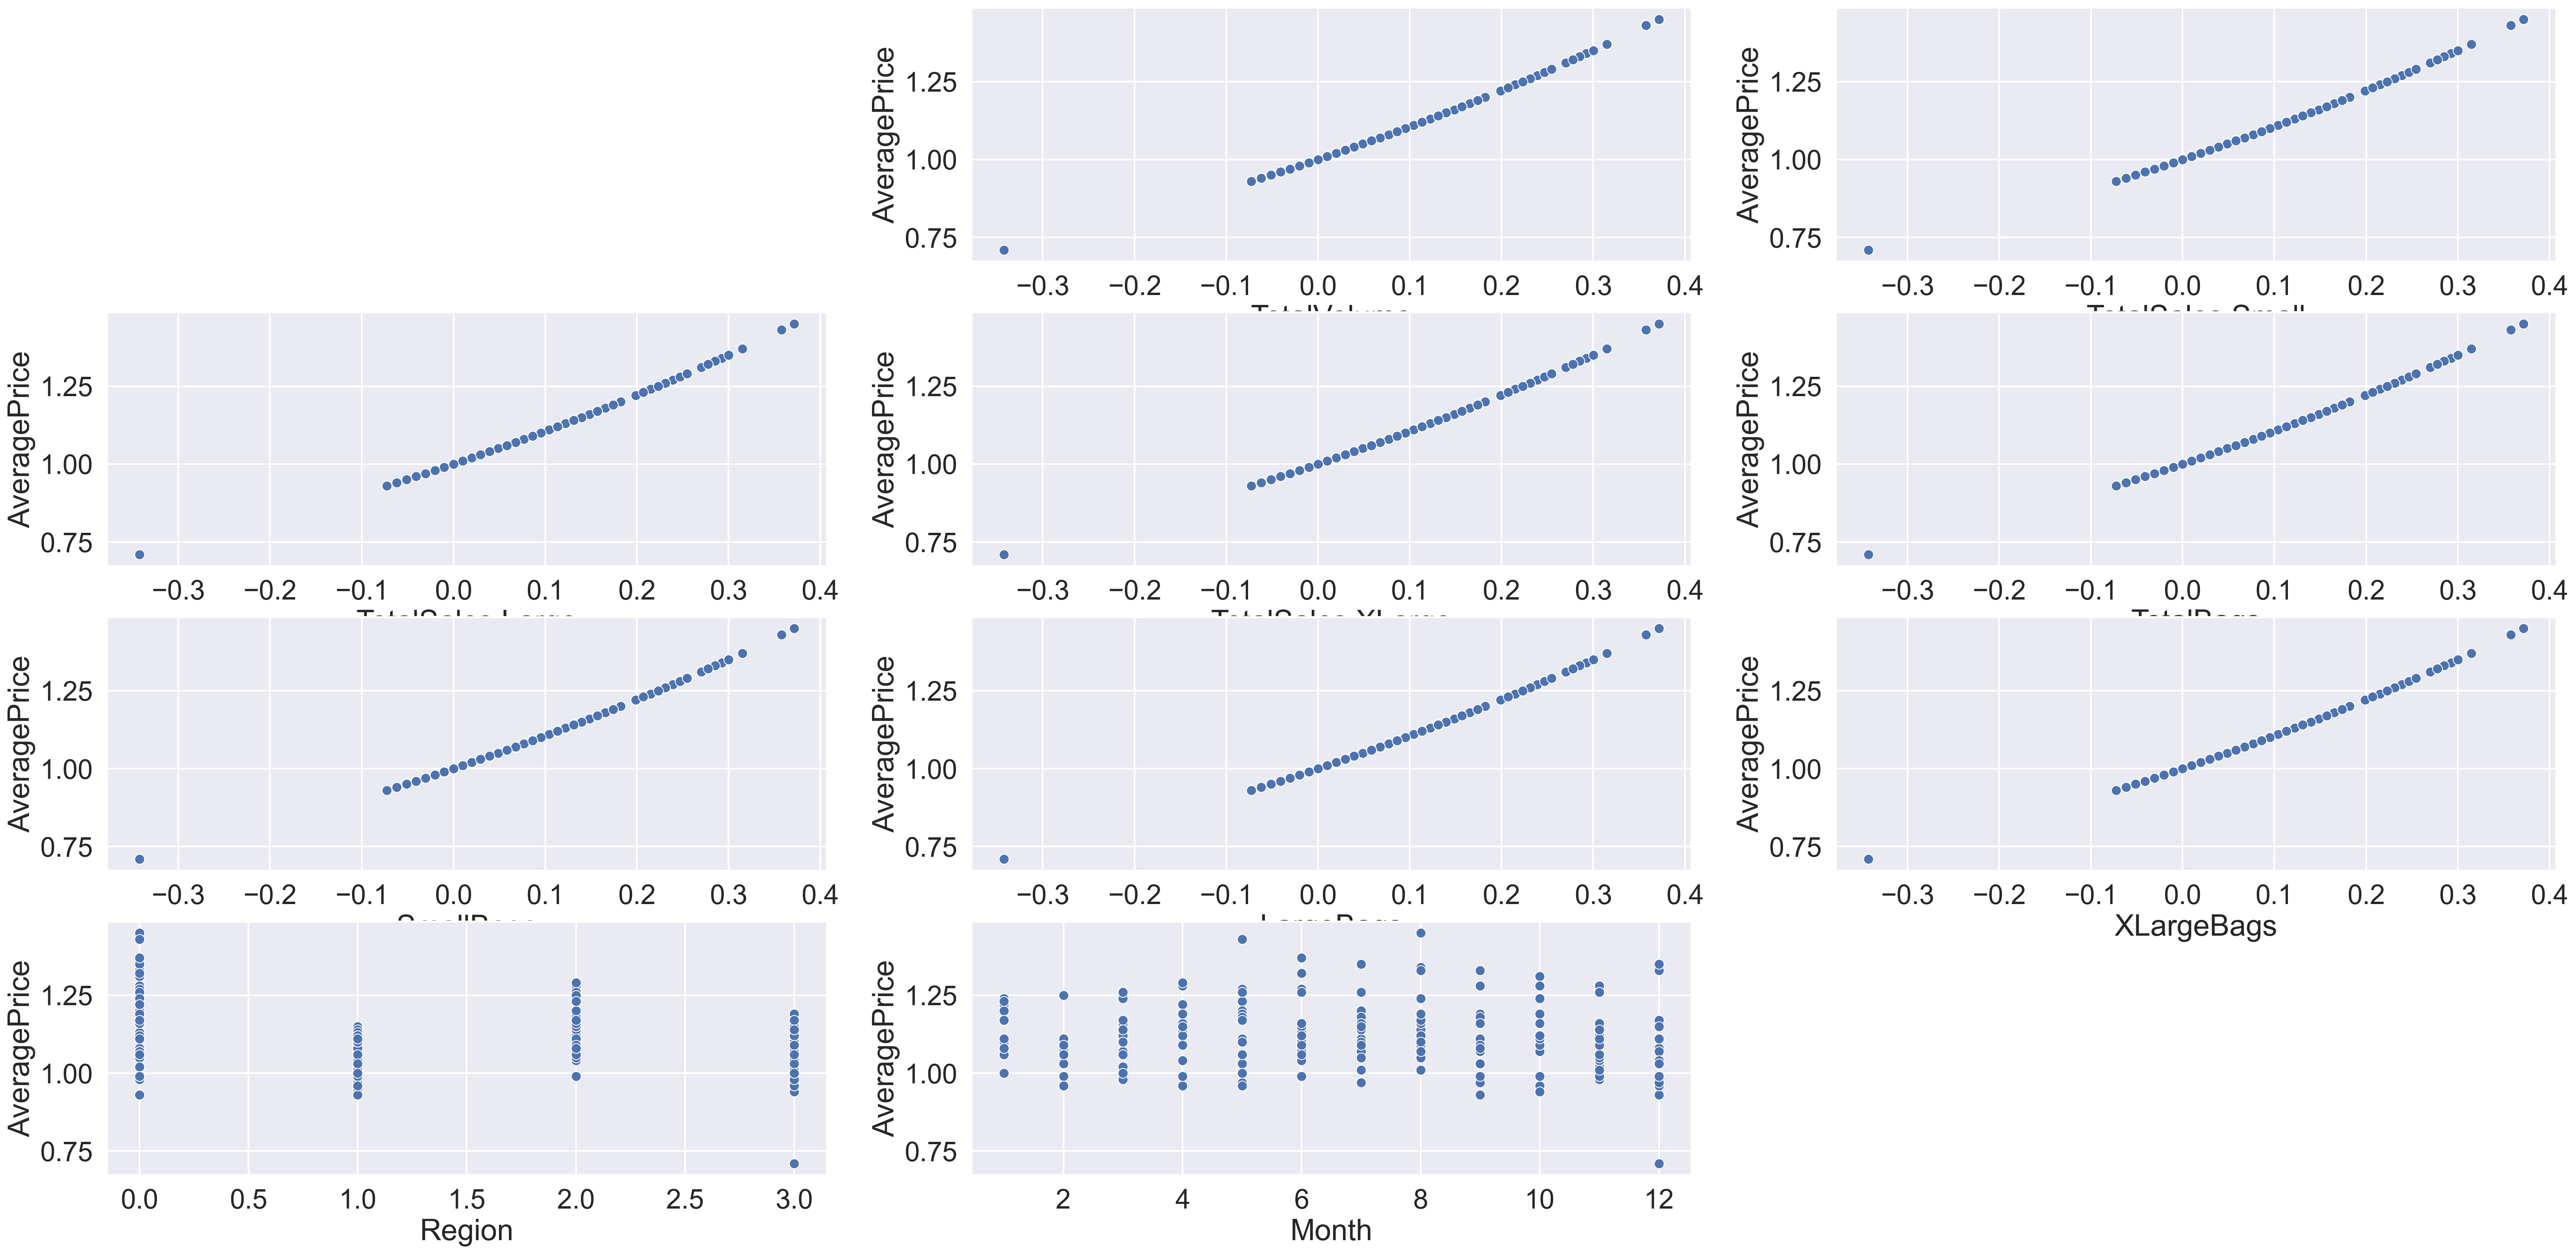

In [51]:
sns.set(style="darkgrid")
plt.figure(dpi=200,figsize=(40,40))
sns.set_context("talk",font_scale=1.5)
for i in range (1,11):
    plt.subplot(8,3,i+1)
    sns.scatterplot(x=(df1[cl[i]]).head(200),y=(df1["AveragePrice"]).head(200),ci=95,palette="gnuplot")

##### Plotting the scatterplot of first 200 rows of all atributes vs the Average price

In [52]:
corr=df1.corr()
corr

AveragePrice  TotalVolume  TotalSales Small  \
AveragePrice           1.000000     0.994371          0.994371   
TotalVolume            0.994371     1.000000          1.000000   
TotalSales Small       0.994371     1.000000          1.000000   
TotalSales Large       0.994371     1.000000          1.000000   
TotalSales XLarge      0.994371     1.000000          1.000000   
TotalBags              0.994371     1.000000          1.000000   
SmallBags              0.994371     1.000000          1.000000   
LargeBags              0.994371     1.000000          1.000000   
XLargeBags             0.994371     1.000000          1.000000   
Region                -0.143053    -0.138882         -0.138882   
Month                 -0.100572    -0.088966         -0.088966   
Day                    0.104330     0.102869          0.102869   

                   TotalSales Large  TotalSales XLarge  TotalBags  SmallBags  \
AveragePrice               0.994371           0.994371   0.994371   0.994371   
TotalVolume                1.000000           1.000000   1.000000   1.000000   
TotalSales Small           1.000000           1.000000   1.000000   1.000000   
TotalSales Large           1.000000           1.000000   1.000000   1.000000   
TotalSales XLarge          1.000000           1.000000   1.000000   1.000000   
TotalBags                  1.000000           1.000000   1.000000   1.000000   
SmallBags                  1.000000           1.000000   1.000000   1.000000   
LargeBags                  1.000000           1.000000   1.000000   1.000000   
XLargeBags                 1.000000           1.000000   1.000000   1.000000   
Region                    -0.138882          -0.138882  -0.138882  -0.138882   
Month                     -0.088966          -0.088966  -0.088966  -0.088966   
Day                        0.102869           0.102869   0.102869   0.102869   

                   LargeBags  XLargeBags    Region     Month       Day  
AveragePrice        0.994371    0.994371 -0.143053 -0.100572  0.104330  
TotalVolume         1.000000    1.000000 -0.138882 -0.088966  0.102869  
TotalSales Small    1.000000    1.000000 -0.138882 -0.088966  0.102869  
TotalSales Large    1.000000    1.000000 -0.138882 -0.088966  0.102869  
TotalSales XLarge   1.000000    1.000000 -0.138882 -0.088966  0.102869  
TotalBags           1.000000    1.000000 -0.138882 -0.088966  0.102869  
SmallBags           1.000000    1.000000 -0.138882 -0.088966  0.102869  
LargeBags           1.000000    1.000000 -0.138882 -0.088966  0.102869  
XLargeBags          1.000000    1.000000 -0.138882 -0.088966  0.102869  
Region             -0.138882   -0.138882  1.000000  0.003907  0.003351  
Month              -0.088966   -0.088966  0.003907  1.000000  0.060388  
Day                 0.102869    0.102869  0.003351  0.060388  1.000000

[Text(1, 0.5, 'AveragePrice'),
 Text(1, 1.5, 'XLargeBags'),
 Text(1, 2.5, 'LargeBags'),
 Text(1, 3.5, 'SmallBags'),
 Text(1, 4.5, 'TotalBags'),
 Text(1, 5.5, 'TotalSales XLarge'),
 Text(1, 6.5, 'TotalSales Large'),
 Text(1, 7.5, 'TotalVolume'),
 Text(1, 8.5, 'TotalSales Small'),
 Text(1, 9.5, 'Day'),
 Text(1, 10.5, 'Region'),
 Text(1, 11.5, 'Month')]

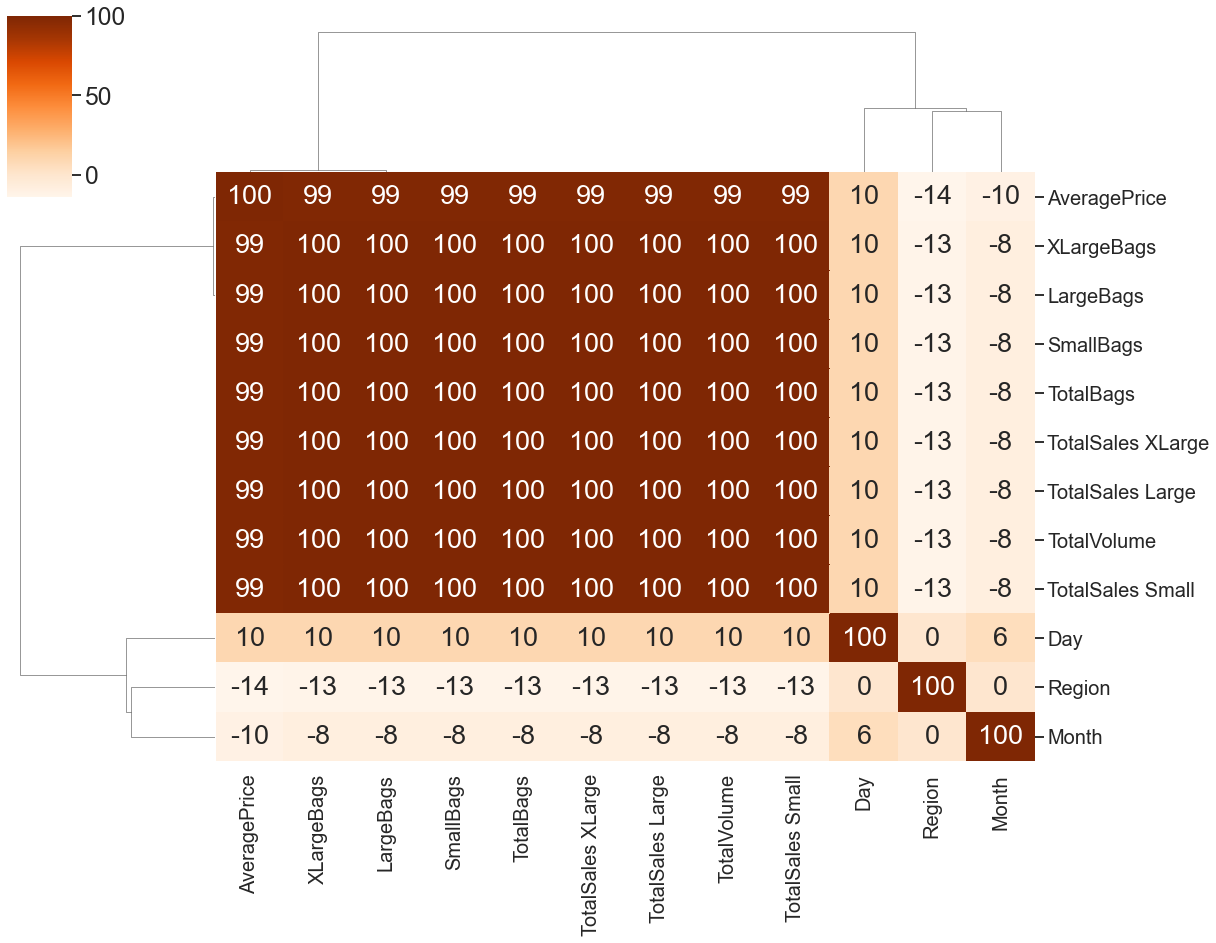

In [53]:
corr = df1.corr().mul(100).astype(int)
g=sns.clustermap(data=corr,annot=True, fmt="d", cmap="Oranges",figsize=(18,14))
cmap = sns.diverging_palette(h_neg=500, h_pos=500,s=100,l=0, as_cmap=True)

g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(),fontsize=20)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(),fontsize=20)

##### After seeing Heatmap, we can say the data is very highly correlated 

## Model Nuilding
##### Now we are going to implement both Regression as well as Classification algorithm.
##### In Regression we use AveragePrice as a target
##### In Classification we use Region as a target

### Regression

##### Before start we import some libraries

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts, RandomizedSearchCV as rsv, cross_val_score as cvs
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import randint

##### Spliting the dataset

In [55]:
x = df1.iloc[:,1:]
y = df1.iloc[:,0]
x

TotalVolume  TotalSales Small  TotalSales Large  TotalSales XLarge  \
0        0.285179          0.285179          0.285179           0.285179   
1        0.300105          0.300105          0.300105           0.300105   
2       -0.072571         -0.072571         -0.072571          -0.072571   
3        0.076961          0.076961          0.076961           0.076961   
4        0.246860          0.246860          0.246860           0.246860   
...           ...               ...               ...                ...   
1503     0.307485          0.307485          0.307485           0.307485   
1504     0.307485          0.307485          0.307485           0.307485   
1505     0.314811          0.314811          0.314811           0.314811   
1506     0.292670          0.292670          0.292670           0.292670   
1507     0.086178          0.086178          0.086178           0.086178   

      TotalBags  SmallBags  LargeBags  XLargeBags  Region  Month  Day  
0      0.285179   0.285179   0.285179    0.285179       0     12   27  
1      0.300105   0.300105   0.300105    0.300105       0     12   20  
2     -0.072571  -0.072571  -0.072571   -0.072571       0     12   13  
3      0.076961   0.076961   0.076961    0.076961       0     12    6  
4      0.246860   0.246860   0.246860    0.246860       0     11   29  
...         ...        ...        ...         ...     ...    ...  ...  
1503   0.307485   0.307485   0.307485    0.307485      28      2    1  
1504   0.307485   0.307485   0.307485    0.307485      28      1   25  
1505   0.314811   0.314811   0.314811    0.314811      28      1   18  
1506   0.292670   0.292670   0.292670    0.292670      28      1   11  
1507   0.086178   0.086178   0.086178    0.086178      28      1    4  

[1362 rows x 11 columns]

In [56]:
y

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1503    1.36
1504    1.36
1505    1.37
1506    1.34
1507    1.09
Name: AveragePrice, Length: 1362, dtype: float64

##### Scaling the data by using Standard Scaler

In [57]:
ss = StandardScaler()
x=ss.fit_transform(x)

In [58]:
y=np.array(y)
y=y.reshape(-1,1)
print("Shape of x =", x.shape, "\nshape of y =",y.shape)

Shape of x = (1362, 11) 
shape of y = (1362, 1)


### Defining Model

In [59]:
def model(mod,x,y):
    r2=0
    for i in range(0,240):
        x_train,x_test,y_train,y_test=tts(x,y,test_size=0.20,random_state=i)
        mod.fit(x_train,y_train)
        pred=mod.predict(x_test)
        r2score= r2_score(y_test,pred)
        MAE= mean_absolute_error(y_test,pred)
        MSE= mean_squared_error(y_test,pred)
        RMSE=np.sqrt(MSE)
        if r2score > r2:
            r2=r2score
            random_state=i
    print("In this",mod,"model",
         "\n Random State =", random_state,
         "\n r2 Score = ", r2score,
         "\n mean abs error value (MAE) = ",MAE,
         "\n mean squared error value(MSE)=",MSE,
         "\n & root mean sq error(RMSE)=",RMSE)

## Linear Regression

In [60]:
lr=LinearRegression()
m1=model(lr,x,y)

In this LinearRegression() model 
 Random State = 149 
 r2 Score =  0.988090025752002 
 mean abs error value (MAE) =  0.012885672503059043 
 mean squared error value(MSE)= 0.0003299869073944726 
 & root mean sq error(RMSE)= 0.01816554175890366


### Checking for over/under fitting 

In [61]:
lr_scr=cvs(lr,x,y,cv=30,scoring="r2")
print("The R2 score at Linear Regression model is :",lr_scr.mean())

The R2 score at Linear Regression model is : 0.9686708612602595


## Lasso Regression

##### before applying searching for best parameters

In [62]:
ls=Lasso()
ls_para={"alpha":(0.001,0.01,0.1,1.0,10)}
ls_rsv=rsv(ls,ls_para,cv=30,n_iter=20)
ls_rsv.fit(x,y)
print("best_score=",ls_rsv.best_score_)
print("best_parameters=",ls_rsv.best_params_)


best_score= 0.9700765402765202
best_parameters= {'alpha': 0.001}


In [63]:
ls=Lasso(alpha=0.001)
m2=model(ls,x,y)

In this Lasso(alpha=0.001) model 
 Random State = 149 
 r2 Score =  0.9881817944161262 
 mean abs error value (MAE) =  0.01279834658383815 
 mean squared error value(MSE)= 0.0003274442941998937 
 & root mean sq error(RMSE)= 0.018095421912735103


### Checking for Over/Under fitting

In [64]:
ls_scr=cvs(ls,x,y,cv=30,scoring="r2")
print("The R2 score at Lasso model is:", ls_scr.mean())

The R2 score at Lasso model is: 0.9700765402765202


## Ridge Regression

##### Checking for best parameters using RandomizedSearchCV

In [65]:
rg=Ridge()
rg_para={"alpha":(0.001,0.01,0.1,1,10,12)}
rg_rsv=rsv(rg,rg_para,cv=30,n_iter=20)
rg_rsv.fit(x,y)
print("best_score = ",rg_rsv.best_score_)
print("best_parameters=",rg_rsv.best_params_)

best_score =  0.9687989330587832
best_parameters= {'alpha': 12}


In [66]:
rg=Ridge(alpha=12)
m3=model(rg,x,y)

In this Ridge(alpha=12) model 
 Random State = 30 
 r2 Score =  0.9880855412090709 
 mean abs error value (MAE) =  0.012917006355028576 
 mean squared error value(MSE)= 0.0003301111595903291 
 & root mean sq error(RMSE)= 0.01816896143400412


### Checking for over/Under fitting

In [67]:
rg_scr=cvs(rg,x,y,cv=30,scoring="r2")
print("The R2 scoe at Ridge model is:",rg_scr.mean())

The R2 scoe at Ridge model is: 0.9687989330587832


## Decision Tree Regressor

##### checking  for best parameters using RandomizedSearchCV


In [68]:
dtr=DecisionTreeRegressor()
dpara={"criterion":("mse","mae","friedman_mse"),"splitter":("best","random"),"max_depth":range(1,8),"min_samples_split":range(3,9)}
dtr_rsv=rsv(dtr,dpara,cv=80,n_iter=40)
dtr_rsv.fit(x,y)
dtr_rsv.best_score_
dtr_rsv.best_params_

{'splitter': 'random',
 'min_samples_split': 3,
 'max_depth': 7,
 'criterion': 'mae'}

In [69]:
dtr=DecisionTreeRegressor(criterion="mse",max_depth=6, min_samples_split=4, splitter="best")
m4=model(dtr,x,y)

In this DecisionTreeRegressor(max_depth=6, min_samples_split=4) model 
 Random State = 88 
 r2 Score =  0.9997296435122128 
 mean abs error value (MAE) =  0.0012584016474034166 
 mean squared error value(MSE)= 7.490704802649465e-06 
 & root mean sq error(RMSE)= 0.0027369151982934116


### Checking for Over/Under fitting

In [70]:
dtr_scr=cvs(dtr,x,y,cv=80,scoring="r2")
print("The R2 score at DecisionTreeRegressor is=",dtr_scr.mean())

The R2 score at DecisionTreeRegressor is= 0.9975517606522682


## KNeighbors Regresssor

##### checking for best  parameters using Randomized Search CV

In [71]:
knn=KNeighborsRegressor()
kp={"n_neighbors":range(2,18),"algorithm":("auto","ball_tree","kd_tree","brute"),"leaf_size":range(4,12)}
knn_rsv=rsv(knn,kp,cv=40,n_iter=30)
knn_rsv.fit(x,y)
knn_rsv.best_params_

{'n_neighbors': 3, 'leaf_size': 10, 'algorithm': 'kd_tree'}

In [72]:
knn=KNeighborsRegressor(n_neighbors=2,leaf_size=8,algorithm="kd_tree")
m5=model(knn,x,y)

In this KNeighborsRegressor(algorithm='kd_tree', leaf_size=8, n_neighbors=2) model 
 Random State = 207 
 r2 Score =  0.9929368895577431 
 mean abs error value (MAE) =  0.010531135531135534 
 mean squared error value(MSE)= 0.0001956959706959706 
 & root mean sq error(RMSE)= 0.01398913759657723


### Checking for over/Under fitting

In [73]:
knn_scr=cvs(knn,x,y,cv=40,scoring="r2")
print("The R2 score at KNeighborsRegressor model is:",knn_scr.mean())

The R2 score at KNeighborsRegressor model is: 0.9645440852575315


## Support vector Regressor

In [74]:
svr=SVR()
m6=model(svr,x,y)

In this SVR() model 
 Random State = 229 
 r2 Score =  0.900931601678796 
 mean abs error value (MAE) =  0.04639844378482618 
 mean squared error value(MSE)= 0.0027448652450304846 
 & root mean sq error(RMSE)= 0.05239146156608426


In [75]:
svr_scr=cvs(svr,x,y,cv=40,scoring="r2")
print("The R2 score at SVR model is:",svr_scr.mean())

The R2 score at SVR model is: 0.6150514407994511


## Random Forest Regressor

In [76]:
rfr=RandomForestRegressor()
m7=model(rfr,x,y)

In this RandomForestRegressor() model 
 Random State = 68 
 r2 Score =  0.9999745926333216 
 mean abs error value (MAE) =  0.000189743589744821 
 mean squared error value(MSE)= 7.039560439560945e-07 
 & root mean sq error(RMSE)= 0.0008390208841000887


### Checking for Over/Under fitting

In [77]:
rfr_scr=cvs(rfr,x,y,cv=40,scoring="r2")
print("The R2 score at RandomForestRegressor model is:",rfr_scr.mean())

The R2 score at RandomForestRegressor model is: 0.9986614280368709


### Now we are going to put all models output into a dataframe for better visualization

In [78]:
infos=[["Linear Regression",149,0.9880,0.9686,0.0181],
      ["Lasso",149,0.9881,0.9700,0.0180],
      ["Ridge",30,0.9880,0.9687,0.1816],
      ["Decision Tree Regressor",88,0.9994,0.9976,0.0037],
      ["SVR",229,0.9009,0.6150,0.0523],
      ["KNeighbors Regressor",207,0.9929,0.9645,0.0139],
      ["RandomForest Regressor",173,0.9999,0.9986,0.0090]]

Scoreboard = pd.DataFrame(infos,columns=["Model Name","Random_State","R2_Score W/O CV","R2_Score with CV","RMSE"])

In [79]:
Scoreboard

Model Name  Random_State  R2_Score W/O CV  R2_Score with CV  \
0        Linear Regression           149           0.9880            0.9686   
1                    Lasso           149           0.9881            0.9700   
2                    Ridge            30           0.9880            0.9687   
3  Decision Tree Regressor            88           0.9994            0.9976   
4                      SVR           229           0.9009            0.6150   
5     KNeighbors Regressor           207           0.9929            0.9645   
6   RandomForest Regressor           173           0.9999            0.9986   

     RMSE  
0  0.0181  
1  0.0180  
2  0.1816  
3  0.0037  
4  0.0523  
5  0.0139  
6  0.0090

##### From above , we can easily say that the RandomForest Regressor is the best model with almost 100% corect result

## Saving model for regression
##### From avove analysis of dataset from regression models, RandomForestRegression is the best model among all with almost 100% R2 score or it will preidict the the correct answer with 99.99%.

In [80]:
import joblib
joblib.dump(rfr,"Avocados_AveragaePrice Prediction.pkl")

['Avocados_AveragaePrice Prediction.pkl']

# Classification

##### We are taking the target column is "Region"
##### Let's import some Classifier first

In [81]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [82]:
df1.dtypes

AveragePrice         float64
TotalVolume          float64
TotalSales Small     float64
TotalSales Large     float64
TotalSales XLarge    float64
TotalBags            float64
SmallBags            float64
LargeBags            float64
XLargeBags           float64
Region                 int32
Month                  int64
Day                    int64
dtype: object

In [83]:
#we can see the data is float, we will convert it to numericby us

In [84]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for columns in df1.columns:
    df1[columns]=le.fit_transform(df1[columns])

In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362 entries, 0 to 1507
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   AveragePrice       1362 non-null   int64
 1   TotalVolume        1362 non-null   int64
 2   TotalSales Small   1362 non-null   int64
 3   TotalSales Large   1362 non-null   int64
 4   TotalSales XLarge  1362 non-null   int64
 5   TotalBags          1362 non-null   int64
 6   SmallBags          1362 non-null   int64
 7   LargeBags          1362 non-null   int64
 8   XLargeBags         1362 non-null   int64
 9   Region             1362 non-null   int64
 10  Month              1362 non-null   int64
 11  Day                1362 non-null   int64
dtypes: int64(12)
memory usage: 138.3 KB


In [86]:
dx=df1.drop(columns=["Region"])
y=df1[["Region"]]

##### Scaling the data by using Standard Scaler

In [87]:
x=ss.fit_transform(dx)
x=pd.DataFrame(x,columns=dx.columns)
print(x.shape)

(1362, 11)


##### Again Splitinng the data

In [88]:
x_train, x_test, y_train, y_test = tts(x,y,test_size=0.20, random_state=0)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(1089, 11) (273, 11)
(1089, 1) (273, 1)


##### Appending all models

In [89]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import cross_val_score

svc=SVC()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
rfc=RandomForestClassifier()
ada=AdaBoostClassifier()
gd=GradientBoostingClassifier()







models=[]
models.append(("SVC",svc))
models.append(("KNeighborsClassifier",knn))
models.append(("DecisionTreeClassifier",dtc))
models.append(("RandomForestClassifier",rfc))
models.append(("GaussianNB",gnb))
models.append(("AdaBoostClassifier",ada))
models.append(("GradientBoostingClassifier",gd))

## Defining Model

In [90]:
Model=[]
score=[]
cvs=[]
rocscore=[]

for name, model in models:
    print("===",name,"===")
    print("\n")
    Model.append(name)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(model)
    print("\n")
    Ac=accuracy_score(y_test,pred)
    print("Accuracy score:",Ac)
    score.append(Ac*100)
    print("\n")
    sc=cross_val_score(model,x,y,cv=10,scoring="accuracy").mean()
    print("Cross val score:",sc)
    cvs.append(sc*100)
    print("\n")
    cr=classification_report(y_test,pred)
    print("Classification Report:",cr)
    print("\n")
    cm=confusion_matrix(y_test,pred)
    print("Confusion matrix:\n:\n",cm)
    print("\n")

=== SVC ===


SVC()


Accuracy score: 0.14652014652014653


Cross val score: 0.15713288965221126


Classification Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         6
           3       0.05      0.11      0.07         9
           4       0.00      0.00      0.00        11
           5       0.57      0.80      0.67        10
           6       0.09      0.10      0.10        10
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00        16
           9       0.17      0.42      0.24        12
          10       0.43      0.40      0.41        15
          11       0.00      0.00      0.00         5
          12       0.14      0.20      0.17         5
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         3
          15 

In [91]:
overall_result = pd.DataFrame({"Model":Model, "Accuracy score":score, "Cross_val_score":score})
overall_result

Model  Accuracy score  Cross_val_score
0                         SVC       14.652015        14.652015
1        KNeighborsClassifier       10.989011        10.989011
2      DecisionTreeClassifier       12.820513        12.820513
3      RandomForestClassifier       13.919414        13.919414
4                  GaussianNB       13.919414        13.919414
5          AdaBoostClassifier        6.227106         6.227106
6  GradientBoostingClassifier       10.989011        10.989011

##### After seeing above result, we will use RandomSearch CV for finding best parameters for SVC model for performance improvement

In [93]:
svc_para={"kernel": ["rbf","poly","linear"],"gamma":[0.01,0.1]}
svc_rsv=rsv(svc,svc_para,cv=30,n_iter=40)
svc_rsv.fit(x,y)
print(svc_rsv)
print(svc_rsv.best_score_)
print(svc_rsv.best_params_)

RandomizedSearchCV(cv=30, estimator=SVC(), n_iter=40,
                   param_distributions={'gamma': [0.01, 0.1],
                                        'kernel': ['rbf', 'poly', 'linear']})
0.1439291465378422
{'kernel': 'rbf', 'gamma': 0.1}


In [110]:
svc=SVC(kernel="rbf",gamma=33,C=500).fit(x,y)
svc_pred= svc.predict(x_test)

acc=accuracy_score(y_test,svc_pred)

acc

0.8241758241758241

### Finally we got 83 % accuracy from SVC model

## Saving model
##### we have "SVC" model with max accuracy

In [ ]:
import joblib
joblib.dump(svc,"Classification Prediction of avocado.pkl" )

# Conclusion
##### After all doing analysis from both the angles Regression and Classification, in Regression we got almost 100% predicted correct answers with AveragePrice as a target variable, but in Classification the accuraccy is around 83% . we have used RandomSearch CV for making model performance better, but we didn't get enough improvement in result in comparision with Regressison models . The accuracy may be increase if use AveragePrice as atarget variable.